<div style="text-align: center; background-color: orange ; padding: 10px;">
    <h2 style="font-weight: bold;">IMPORTING VARIOUS MODULES</h2>
</div>

In [1]:
# data manipulation
import numpy as np
import pandas as pd

#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


<div style="text-align: center; background-color: orange ; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


<div style="text-align: center; background-color: orange; padding: 10px;">
    <h2 style="font-weight: bold;">DATA PRE PROCESSING</h2>
</div>

### <span style='color:blue'> 1] COMPUTING SIZE OF DATASET </span>

In [5]:
data.shape

(1470, 35)

### <span style='color:blue'> 2] ENLIST COLUMNS OF DATASET </span>

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### <span style='color:blue'> 3] GENERATING BASIC INFORMATION OF ATTRIBUTES </span>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### <font color=red>Inference:</font>

1. There are only 26 Numerical Attributes in the dataset.
2. On the other hand we have 9 Categorical Attributes.

### <span style='color:blue'> 4] DESCRIPTIVE ANALYSIS ON NUMERICAL ATTRIBUTES </span>

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


#### <font color=red>Inference:</font>

1. The Minimum Age is 18 which conveys that All employees are Adult. So there's no need of Over18 Attribute for our analysis.
2. The Stanard Deviation value of EmployeeCount and StandardHours is 0.00 which conveys that All values present in this attribute are same.
3. Attribute EmployeeNumber represents a unique value to each of the employees, which will not provide any meaningful inisghts.
4. Since this Attribute will not provide any meaningful insights in our analysis we can simply drop these attributes.

### <span style='color:blue'> 5] CHECK FOR MISSING VALUES </span>

In [9]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### <span style='color:blue'> 6] DROP UNNECESSARY COLUMNS </span>

In [10]:
# Calculate the number of columns have one unique value
one_unique=dict()
for col in data.columns:
    if len(data[col].unique())== 1:
           one_unique.update({col:data[col].unique().tolist()})
            
print('The name of columns with single value: %s' %one_unique)

The name of columns with single value: {'EmployeeCount': [1], 'Over18': ['Y'], 'StandardHours': [80]}


**Observation Report:** _We notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, So we are going to drop those columns._

In [11]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [12]:
# Print top 5 rows in the dataframe
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### <span style='color:blue'> 7] ENLISTING NUMERICAL FEATURES </span>

In [13]:
data.select_dtypes(np.number).sample(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
552,56,832,9,3,3,81,3,4,4,11103,...,3,3,0,30,1,2,10,7,1,1
770,46,430,1,4,4,40,3,5,4,19627,...,3,4,2,23,0,3,2,2,2,2
1163,37,1470,10,3,2,71,3,1,2,3936,...,3,1,1,8,2,1,8,4,7,7
1086,50,333,22,5,3,88,1,4,4,14411,...,3,4,0,32,2,3,32,6,13,9
145,30,201,5,3,4,84,3,1,1,3204,...,3,4,1,8,3,3,3,2,2,2


#### <font color=red>Inference:</font>

1. Some of the numerical features are storing cateegories labelled in numbers.
2. So for better analysis we will replace those labelled numerical values with appropriate categorical values.

### 7.1] Labelling Categories in Numerical Feature

In [14]:
data["Education"] = data["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})

data["JobLevel"] = data["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",5:"Executive Level"})
data["WorkLifeBalance"] = data["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})
                                        
col=["RelationshipSatisfaction","JobSatisfaction","JobInvolvement","EnvironmentSatisfaction","PerformanceRating"]
            
for i in data[col]:
    data[i].replace({1:"Low",2:"Medium",3:"High",4:"Very High"},inplace=True)



### <span style='color:blue'> 8] ENLISTING CATEGORICAL FEATURES </span>

In [15]:
data.select_dtypes(include="O").sample(5)

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
1270,No,Travel_Rarely,Sales,College,Life Sciences,Very High,Female,Low,Junior Level,Sales Executive,Very High,Single,No,High,Low,Better
1309,No,Travel_Rarely,Sales,Bachelor,Medical,High,Male,High,Junior Level,Sales Executive,Very High,Single,No,High,Low,Better
1437,No,Non-Travel,Research & Development,Bachelor,Life Sciences,Very High,Male,High,Executive Level,Manager,Very High,Single,No,High,High,Good
1303,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,High,Female,Medium,Mid Level,Manufacturing Director,Medium,Divorced,Yes,High,High,Better
747,No,Travel_Rarely,Sales,Master,Life Sciences,Medium,Male,High,Junior Level,Sales Executive,Very High,Single,Yes,High,High,Better


### <span style='color:blue'> 9] DESCRIPTIVE ANALYSIS ON CATEGORICAL ATTRIBUTES </span>

In [16]:
data.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,Entry Level,543
JobRole,1470,9,Sales Executive,326


#### <font color=red>Inference:</font>

1. All the categorical attributes are having low cardiniality.
2. Attrition and OverTime column is highly biased towards No Category.
3. Businesstravel Attribute is highly biased towards Travel_Rarely category.

### <span style='color:blue'> 10] CHECKING UNIQUE VALUE OF CATEGORICAL ATTRIBUTES </span>

In [17]:
# Calculate the number of unique values in each column
for column in data.columns:
    print(f"{column} - Number of unique values : {data[column].nunique()}")
    print("=============================================================")

Age - Number of unique values : 43
Attrition - Number of unique values : 2
BusinessTravel - Number of unique values : 3
DailyRate - Number of unique values : 886
Department - Number of unique values : 3
DistanceFromHome - Number of unique values : 29
Education - Number of unique values : 5
EducationField - Number of unique values : 6
EnvironmentSatisfaction - Number of unique values : 4
Gender - Number of unique values : 2
HourlyRate - Number of unique values : 71
JobInvolvement - Number of unique values : 4
JobLevel - Number of unique values : 5
JobRole - Number of unique values : 9
JobSatisfaction - Number of unique values : 4
MaritalStatus - Number of unique values : 3
MonthlyIncome - Number of unique values : 1349
MonthlyRate - Number of unique values : 1427
NumCompaniesWorked - Number of unique values : 10
OverTime - Number of unique values : 2
PercentSalaryHike - Number of unique values : 15
PerformanceRating - Number of unique values : 2
RelationshipSatisfaction - Number of uniq

In [18]:
categorical_features = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 30:
        categorical_features.append(column)
        print(f"{column} : {data[column].unique()}")
        print(data[column].value_counts())
        print("====================================================================================")
categorical_features.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Education : ['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
EnvironmentSatisfaction : ['Medium' 'High' 'Very High' 'Low']
High 

<div style="text-align: center; background-color: orange; padding: 10px;">
    <h2 style="font-weight: bold;">EXPLORATORY DATA ANALYSIS</h2>
</div>

### <span style='color:blue'> 1] VISUALIZING THE EMPLOYEE ATTRITION RATE. </span>

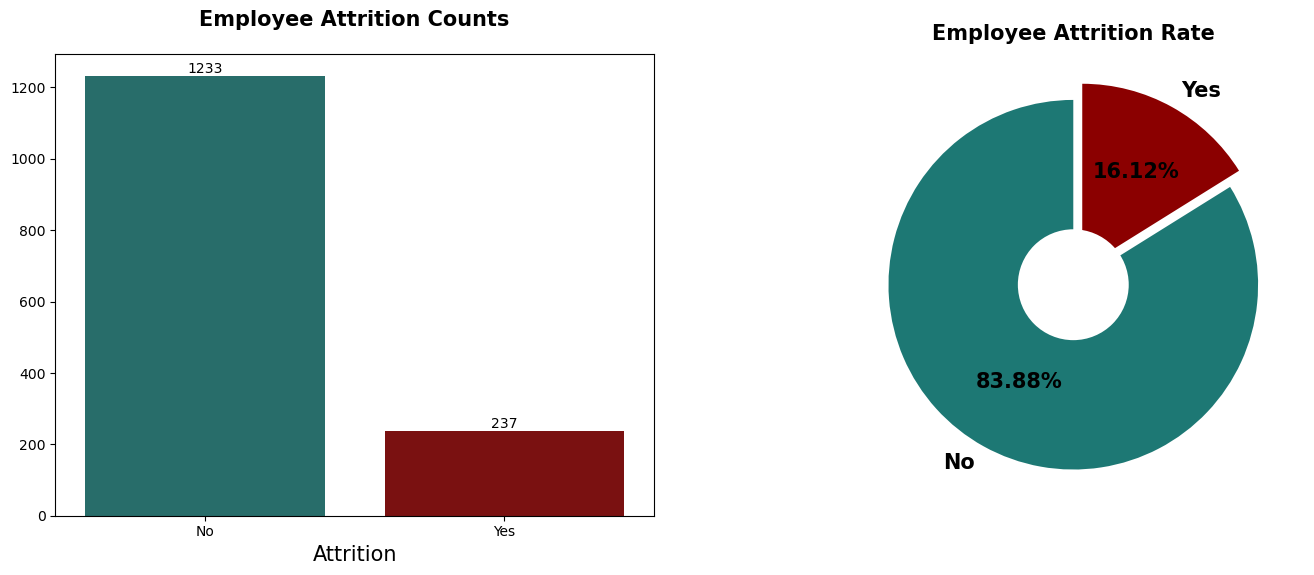

In [19]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = data["Attrition"].value_counts()
ax=sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette=["#1d7874","#8B0000"])
plt.title("Employee Attrition Counts",fontweight="black",size=15,pad=20)
plt.xlabel("Attrition",size=15)
for i in ax.containers:
    ax.bar_label(i)


#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors =["#1d7874","#8B0000"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=15,pad=10)
plt.show()


### <font color=red>Inference:</font>

1. The employee attrition rate of this organization is 16.12%.
2. According to experts in the field of Human Resources, says that the attrition rate 4% to 6% is normal in organization.
3. So we can say the attrition rate of the organization is at a dangerous level.
4. Therefore the organization should take measures to reduce the attrition rate.
5. The dataset is a imbalanced dataset.

### <span style='color:blue'>2] VISUALIZING THE CATEGORICAL ATTRIBUTES ATTRITION RATE. </span>

In [20]:
attrition= data.query("Attrition =='Yes'")
attrition.drop('Attrition',axis=1,inplace=True)
attrition=attrition.select_dtypes(include="O")
attrition.head()

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,Junior Level,Sales Executive,Very High,Single,Yes,High,Low,Bad
2,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,Entry Level,Laboratory Technician,High,Single,Yes,High,Medium,Better
14,Travel_Rarely,Research & Development,Bachelor,Life Sciences,High,Male,Medium,Entry Level,Laboratory Technician,High,Single,Yes,High,Medium,Better
21,Travel_Rarely,Sales,Master,Life Sciences,High,Male,Medium,Entry Level,Sales Representative,Low,Single,No,Very High,Medium,Better
24,Travel_Rarely,Research & Development,Below College,Medical,Medium,Male,High,Entry Level,Research Scientist,Low,Single,No,High,High,Better


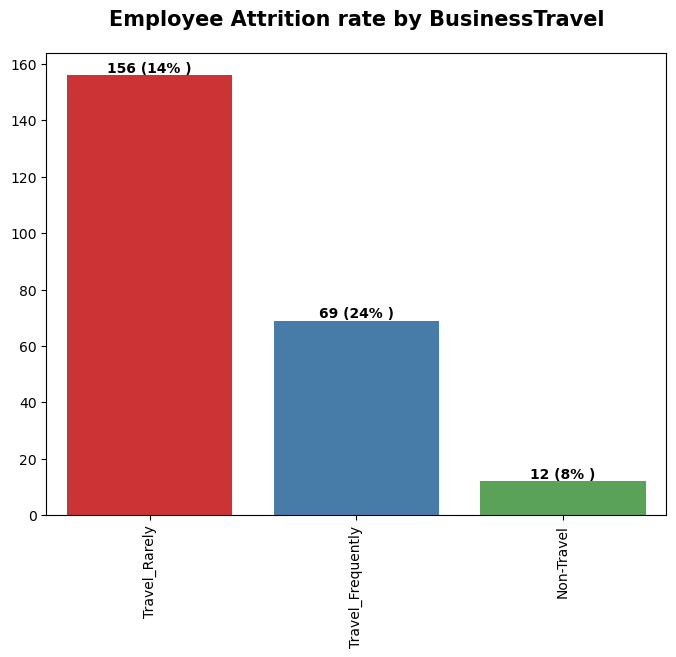

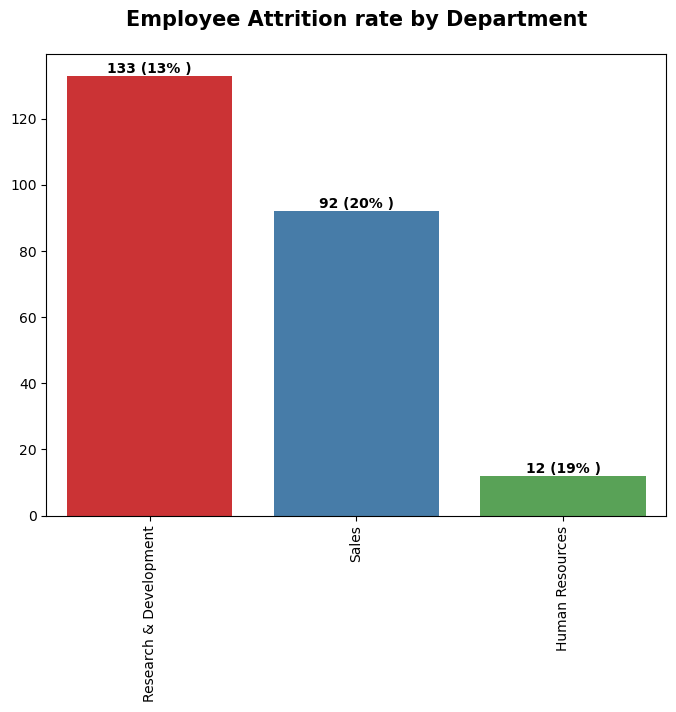

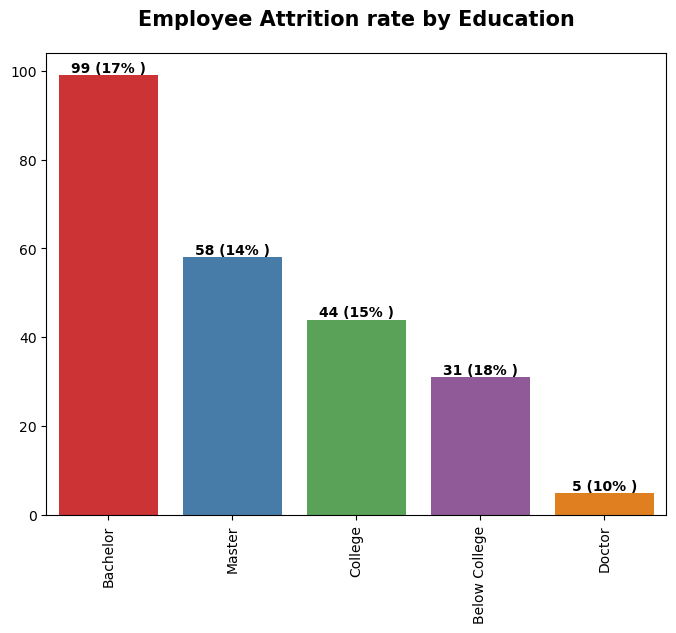

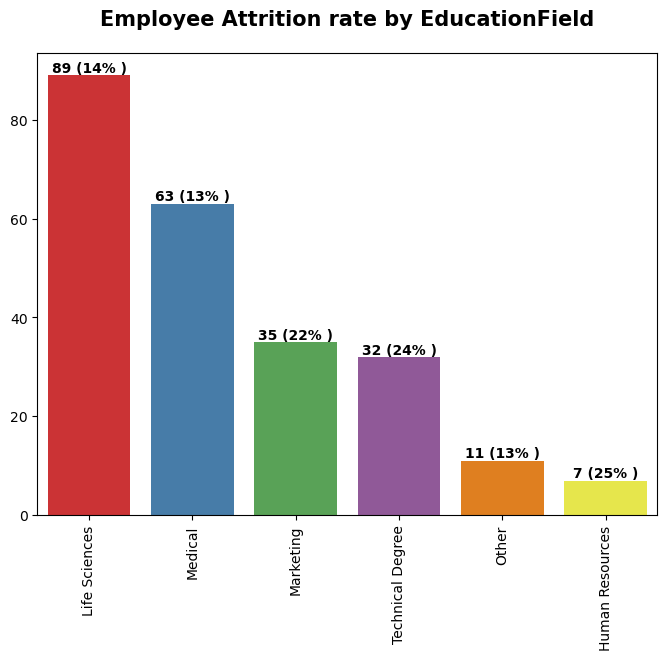

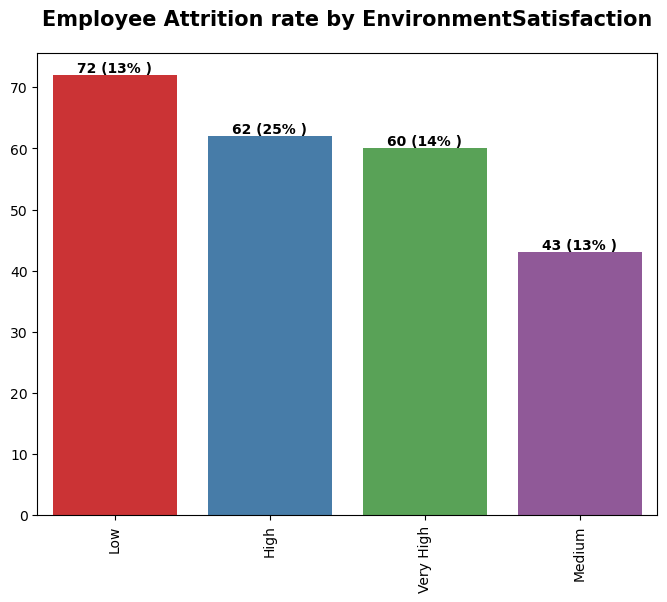

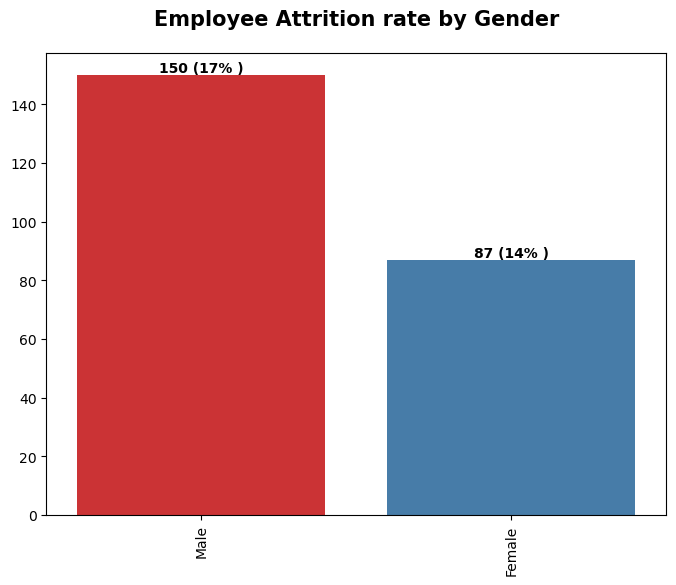

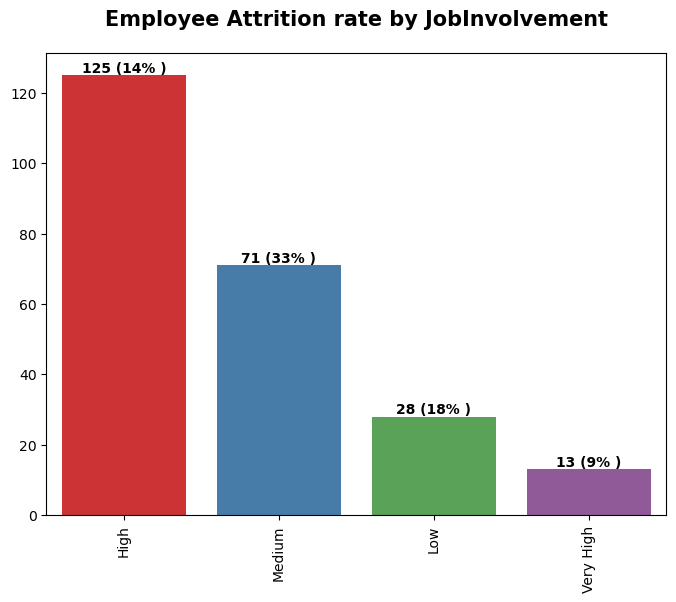

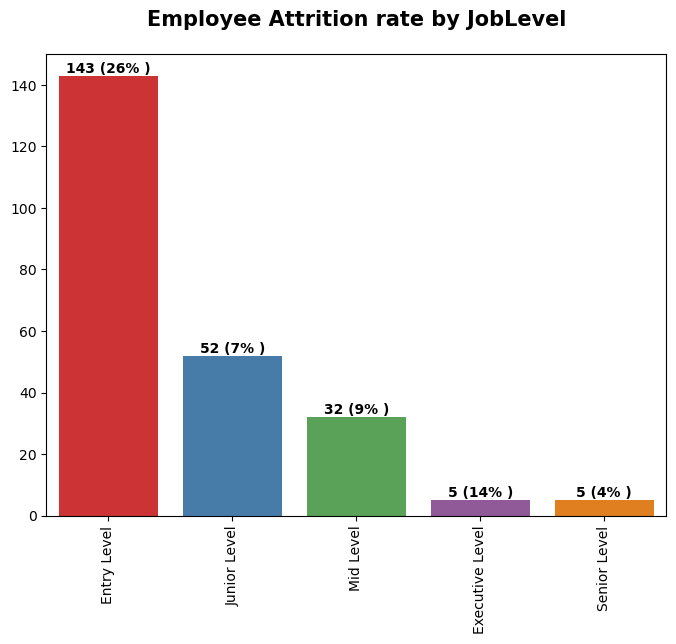

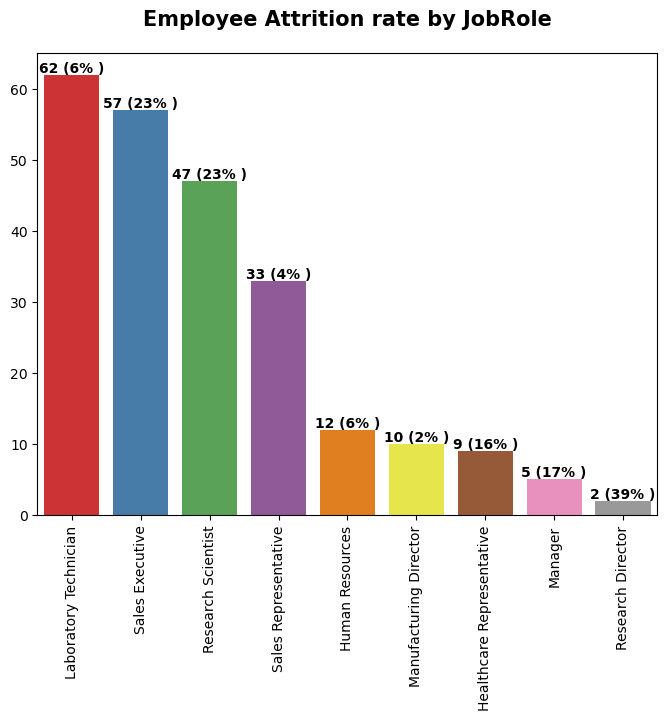

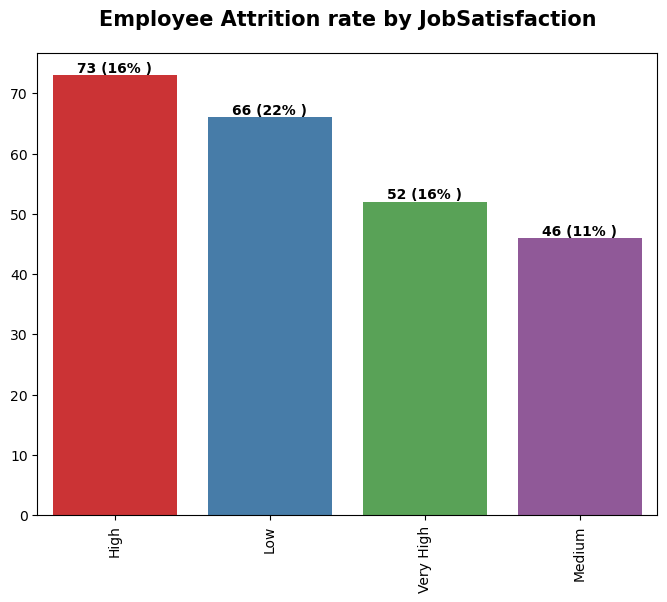

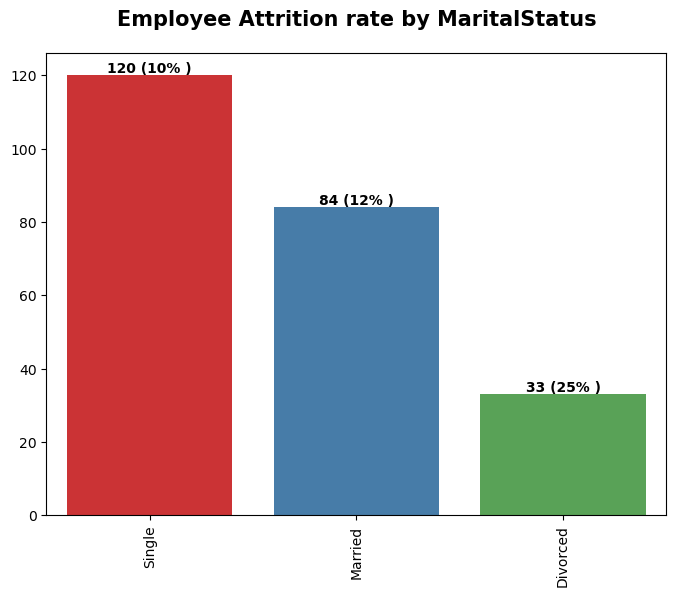

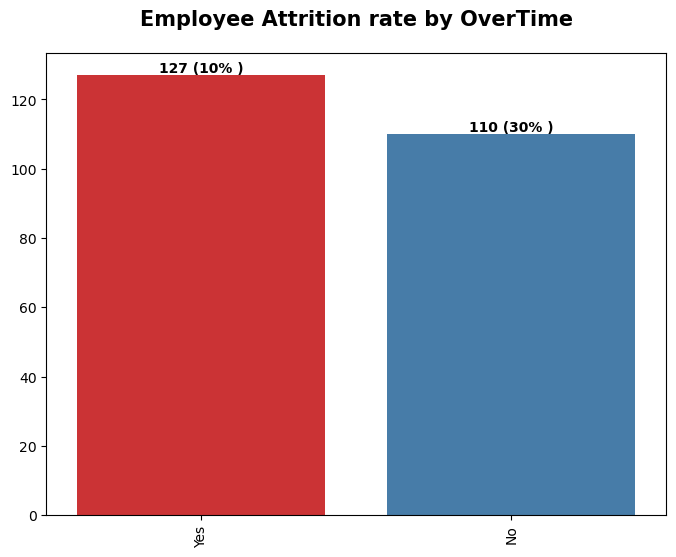

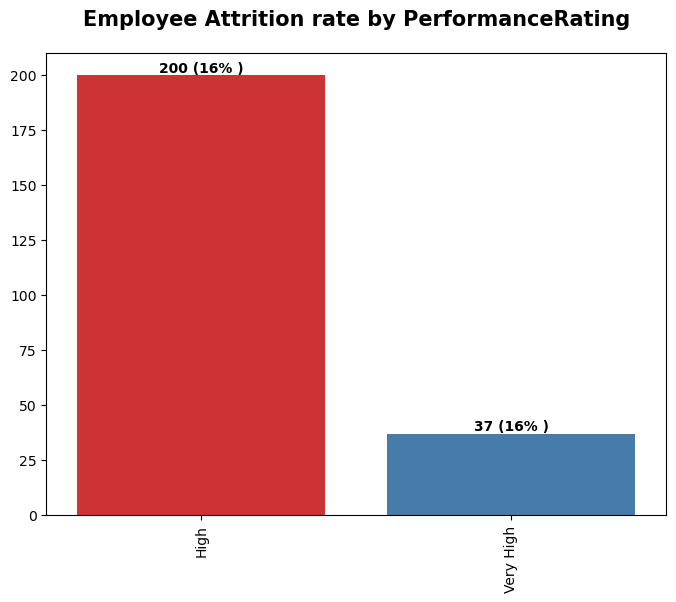

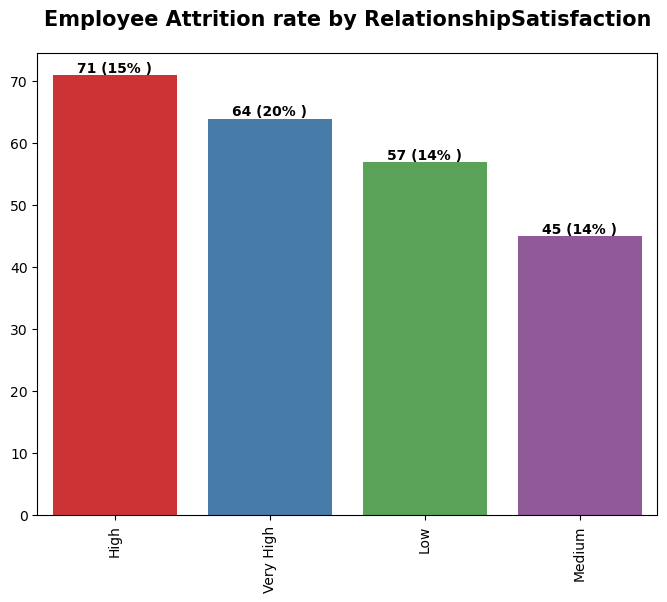

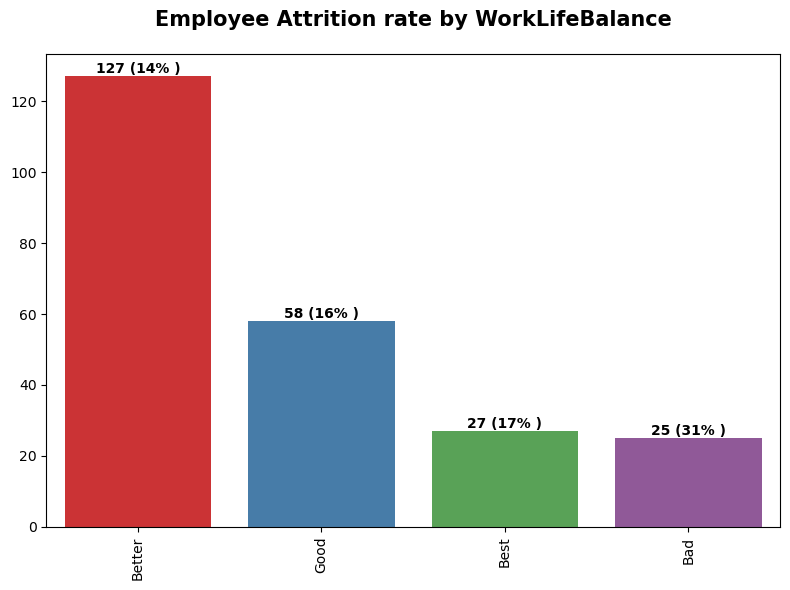

In [21]:
for category in attrition:
    plt.figure(figsize=(8,6))
    value_1 = data[category].value_counts()
    value_2 = attrition[category].value_counts()
    attrition_rate = np.floor((value_2/value_1)*100).values
    sns.barplot(x=value_2.index, y=value_2.values,palette='Set1')
    for index,value in enumerate(value_2):
        plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=10,fontweight="black")
    plt.title(f"Employee Attrition rate by {category}",fontweight="black",size=15,pad=20)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### <font color=red>Inference:</font>
BUSINESS TRAVEL:
1. Most of the employees in the organization Travel Rarely.
2. Highest employee attrition can be observed by those employees who Travels Frequently.
3. Lowest employee attrition can be observed by those employees who are Non-Travel.

DEPARTMENT:
1. Most of the employees are from Research & Development Department.
2. Highest Attrition is in the Sales Department.
3. Human Resources Department Attrition rate is also very high.
4. Though of highest employees in Research & Development department there is least attrition compared to other departments.

EDUCATION:
1. Most of the employees in the organization have completed Bachelors or Masters as their education qualification.
2. Very few employees in the organization have completed Doctorate degree as their education qualification.
3. We can observe a trend of decreasisng in attrition rate as the education qualification increases.

EDUCATION FIELD:
1. Most of the employees are either from Life Science or Medical Education Field.
2. Very few employees are from Human Resources Education Field.
3. Education Fields like Human Resources, Marketing, Technical is having very high attrition rate.
4. This may be because of work load becuase there are very few employees in these education fields compared to education field with less attrition rate.

ENVIRONMENT SATISFACTION:
1. Most of the employees have rated the organization environment satisfaction High & Very High.
2. Though the organization environment satisfaction is high still there's very high attriton in this envirnoment.
3. Attrition Rate increases with increase in level of environment satisfication.

GENDER:
1. The number of male employees in the organization accounts for a higher proportion than female employees by more than 20%.
2. Male employees are leaving more from the organization compared to female employees.

JOB LEVEL:
1. Most of the employees in the organization are at Entry Level or Junior Level.
2. Highest Attrition is at the Entry Level.
3. As the level increases the attrition rate decreases.

JOB ROLE:
1. Most employees is working as Sales executive, Research Scientist or Laboratory Technician in this organization.
2. Highest attrition rates are in sector of Research Director, Sales Executive, Research Scientist.

JOB SATISFACTION:
1. Most of the employees have rated their job satisfaction as high or very high.
2. Employees who rated their job satisfaction low are mostly leaving the organization.
3. All the categories in job satisfaction is having high attrition rate.

MARITAL STATUS:
1. Most of the employees are Married in the organization.
2. The attrition rate is very high of employees who are divorced.
3. The attrition rate is low for employees who are single.

OVER TIME:
1. Most of the employees doesn't work for OverTime.
2. The feature OverTime is having a very high class imbalance due to which we can't make any meaningful insights.

PERFORMACE RATING:
1. Most of the employees are having excellent performance rating.
2. Both the categories in this field is having same attriton rate.
3. That's why we can't generate any meaningful inisghts.

RELATIONSHIP SATISFACTION:
1. Most of the employees are having high or very high relationship satisfaction.
2. Though the relationship satification is high there's a high attrition rate.
3. All the categories in this feature is having a high attriton rate.

WORK LIFE BALANCE:
1. More than 60% of employees are having a better work life balance.
2. Employees with Bad Work Life Balance is having Very High Attrition Rate.
3. Other Categories is also having High attriton Rate.


In [22]:
numerical=data.select_dtypes(include="int64")
numerical

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,5993,19479,8,11,0,8,0,6,4,0,5
1,49,279,8,61,5130,24907,1,23,1,10,3,10,7,1,7
2,37,1373,2,92,2090,2396,6,15,0,7,3,0,0,0,0
3,33,1392,3,56,2909,23159,1,11,0,8,3,8,7,3,0
4,27,591,2,40,3468,16632,9,12,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2571,12290,4,17,1,17,3,5,2,0,3
1466,39,613,6,42,9991,21457,4,15,1,9,5,7,7,1,7
1467,27,155,4,87,6142,5174,1,20,1,6,0,6,2,0,3
1468,49,1023,2,63,5390,13243,2,14,0,17,3,9,6,0,8


### <span style='color:blue'>3] VISUALIZING THE NUMERICAL ATTRIBUTES ATTRITION RATE. </span>

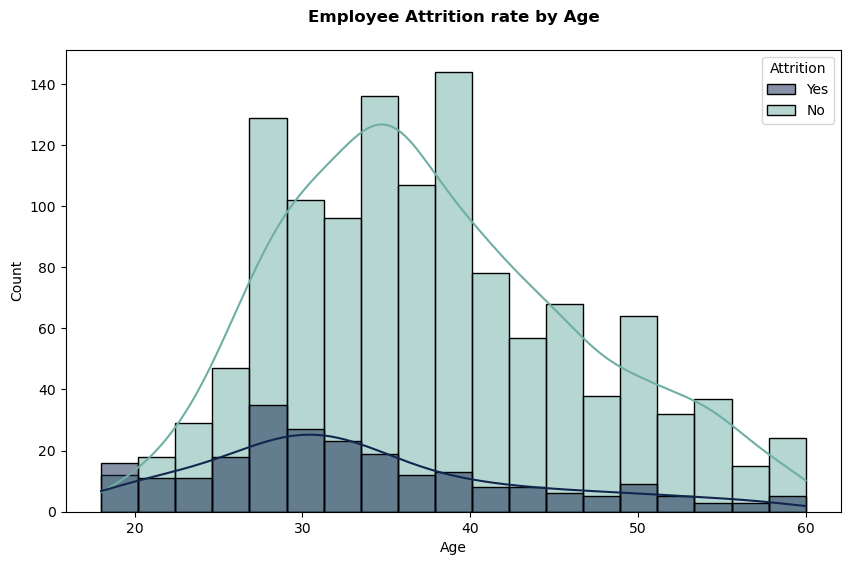

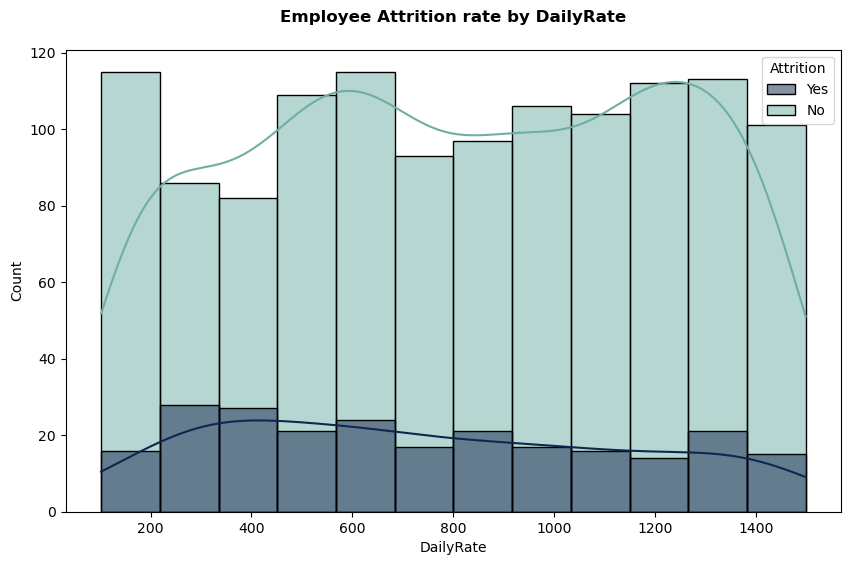

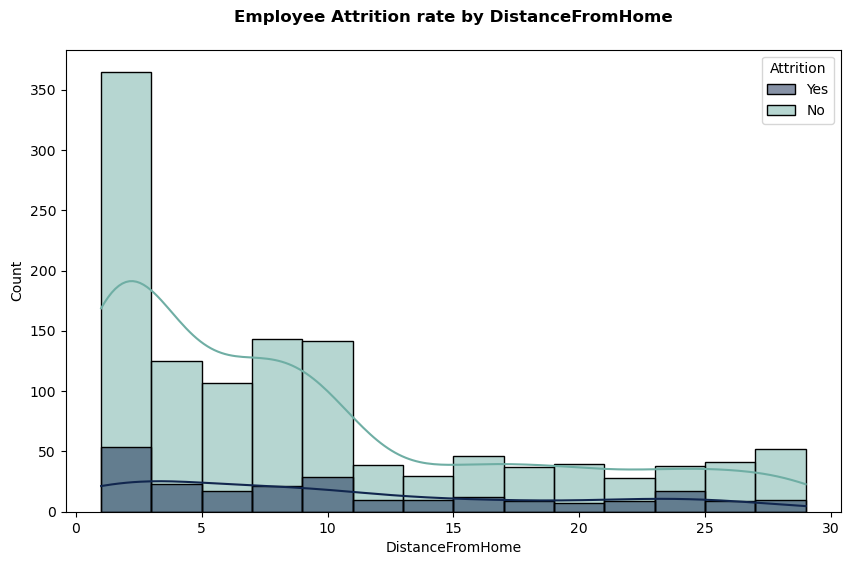

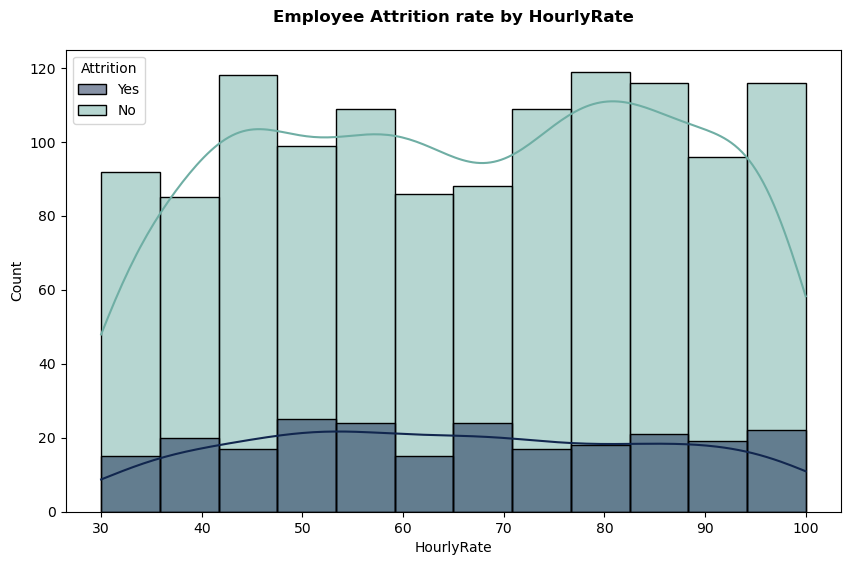

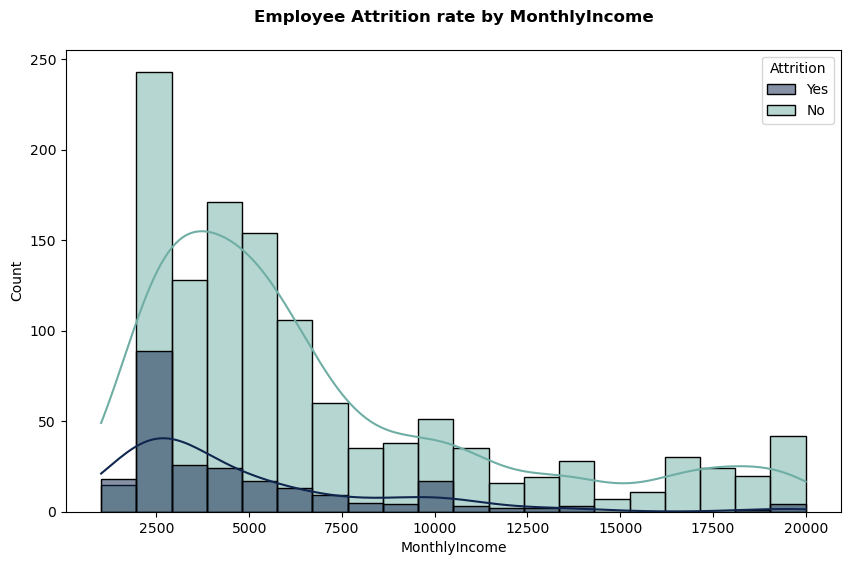

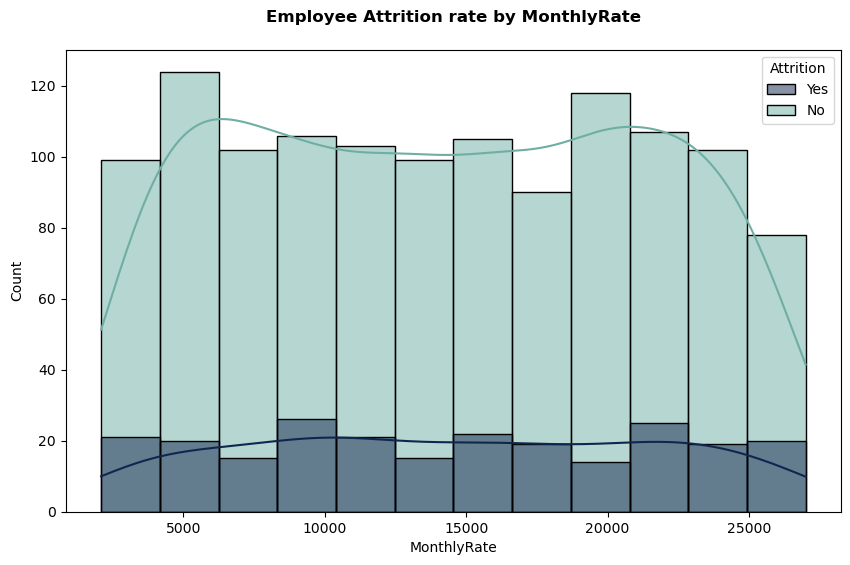

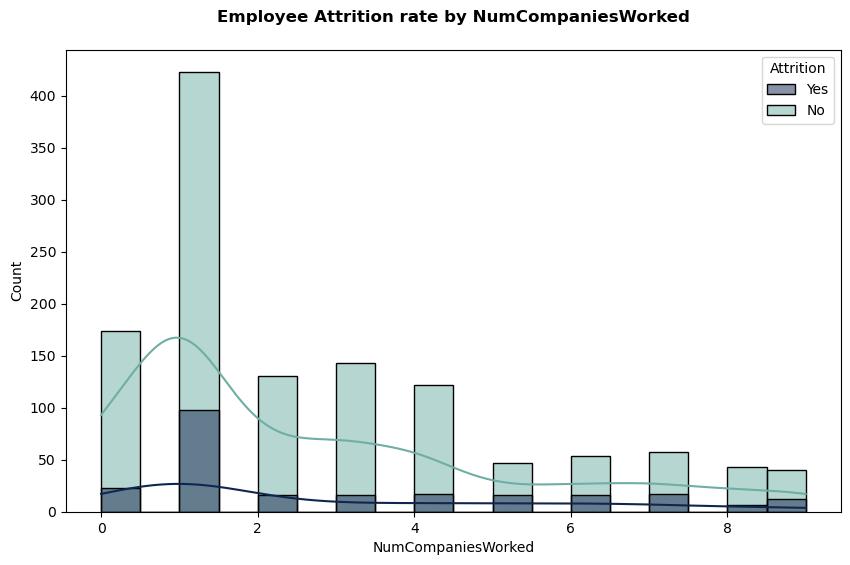

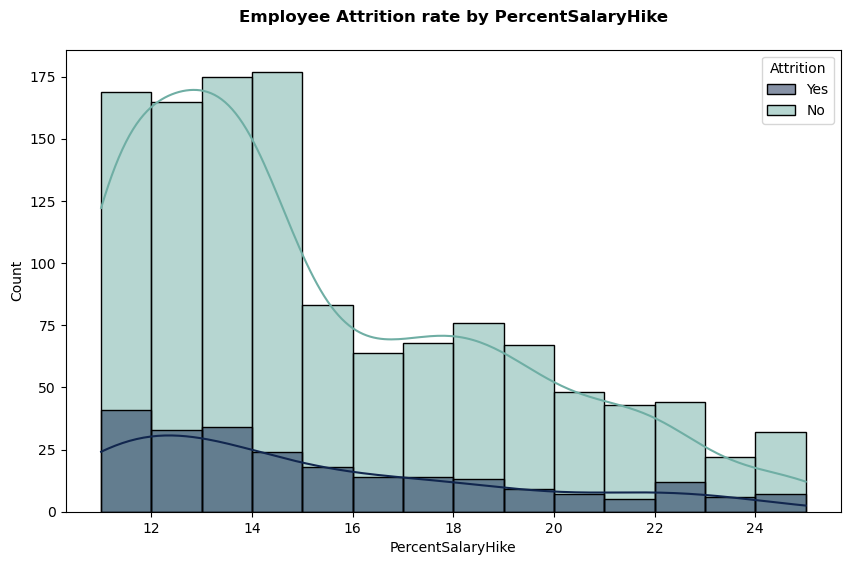

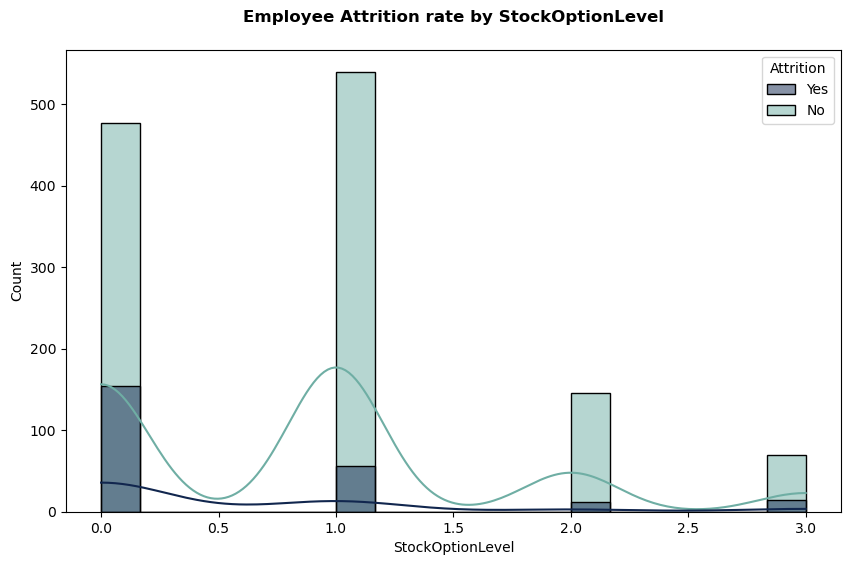

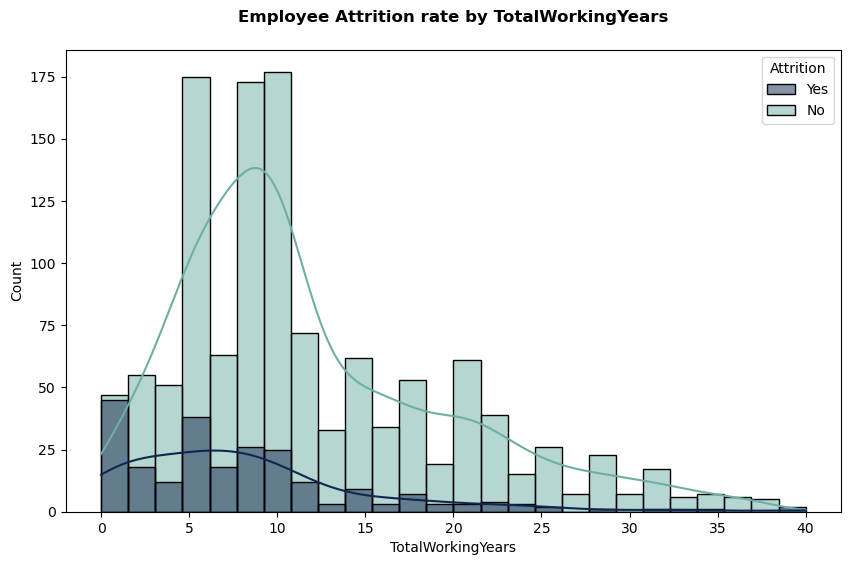

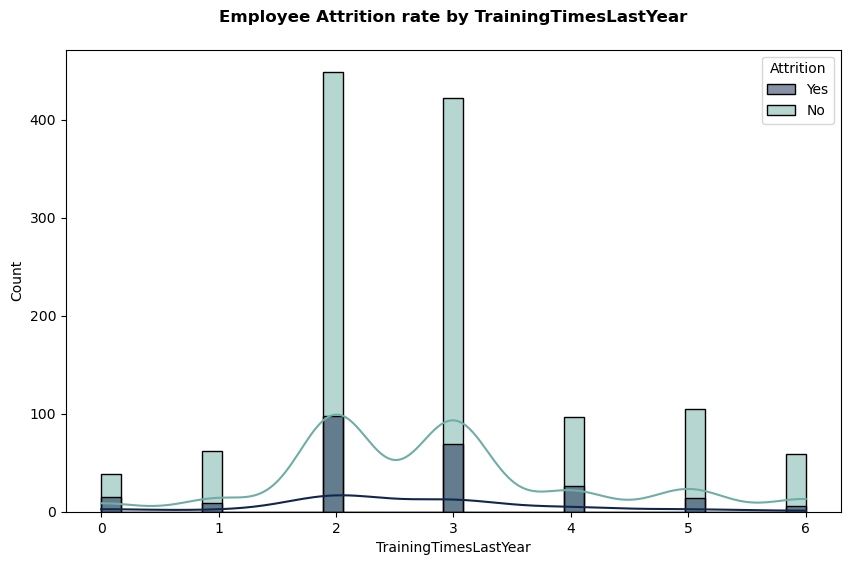

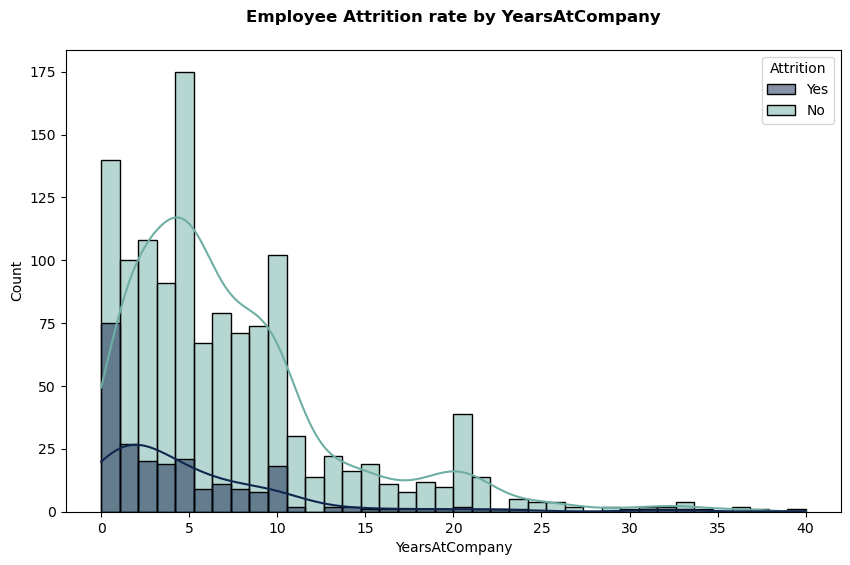

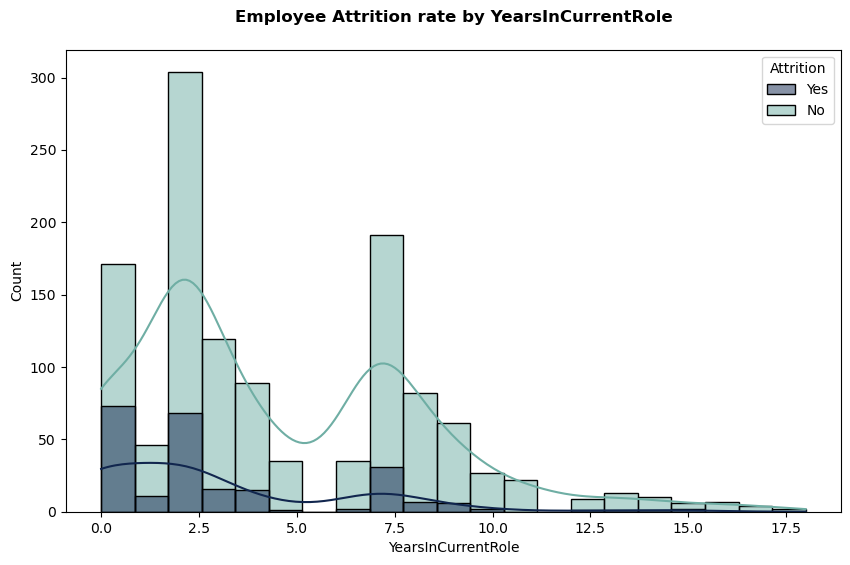

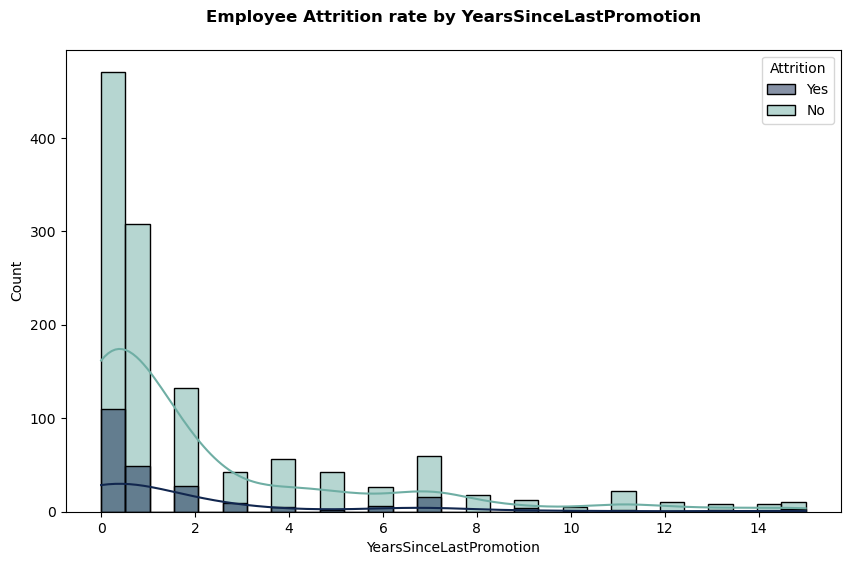

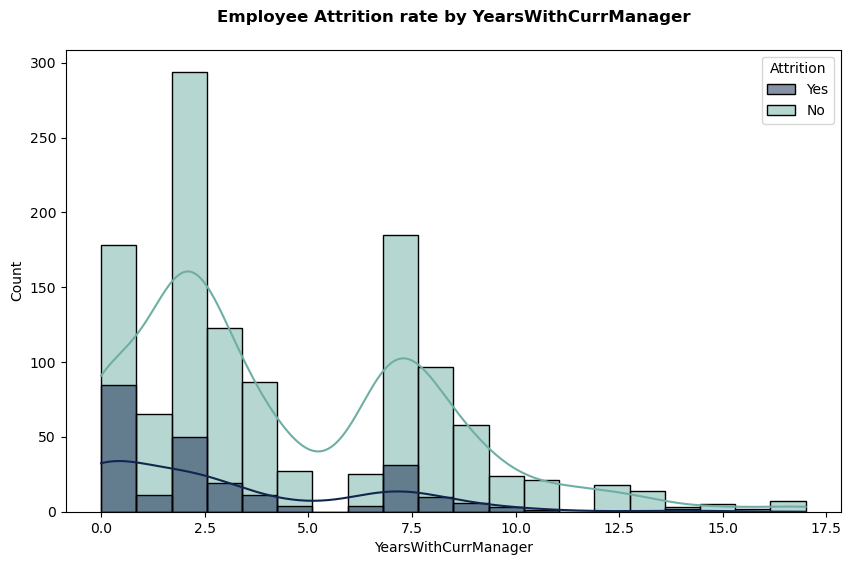

In [23]:
for num in numerical:
    plt.figure(figsize=(10,6))
    sns.histplot(x=num, hue="Attrition", kde=True ,data=data,palette=["#11264e","#6faea4"])
    plt.title(f"Employee Attrition rate by {num}",fontweight="black",size=12,pad=20)

#### <font color=red>Inference:</font>
AGE
1. Most of the emloyees are between age 30 to 40.
2. We can clearly observe a trend that as the age is increasing the attrition is decreasing.
3. From the boxplot we can also observe that the medain age of employee who left the organization is less than the employees who are working in the organization.
4. Employees with young age leaves the company more compared to elder employees.

DAILY RATE
1. Employees with Average DailyRate & High Daily Rate are approxiamately equal.
2. But the attrition rate is very high of employees with average Daily Rate compared to the employees with High DailyRate. 
3. The attrition rate is also high of employees with low DailyRate.
4. Employees which are not getting High Daily Rate are mostly leaving the organization.

NUMBER OF COMPANIES WORKED
1. Employees worked in less than 2 companies having higher attrition than employess worked in more companies.

PERCENT SALARY HIKE
1. Very Few employees are getting a high percent dalary hike.
2. As the amount of percent salary increases the attrition rate decreases.

TOTAL WORKING YEARS
1. Most of the employees are having a total of 5 to 10 years of working experience. But their Attrition Rate is also **very high.
2. Employee with working experience of less than 10 years are having High Attrition Rate.
3. Employee with working experience of more than 10 years are having Less Attrition Rate.

YEARS AT COMPANY
1. Most employees has worked for 2 to 10 years in the organization.
2. Very few employees has working for less than 1 year or more than 10 years.
3. Employee who have worked for 2-5 years are having very high attrition rate.
4. Employee who have worked for 10+ years are having low attrition rate.

YEARS IN CURRENT ROLE
1. Most employees has worked for 2 to 10 years for the same role in the organization.
2. Very few employees has worked for less than 1 year or more than 10 years in the same role.
3. Employee who has worked for 2 to 0 years in the same role are having very high attrition rate.
4. Employee who has worked for 10+ years in the same role are having low attrition rate.

YEARS SINCE LAST PROMOTION
1. Almost 36% of employee has not been promoted since 2 to 5 years.
2. Almost 8% of employees has not been promoted since 10+ years.
3. All the categories in this feature is having high attrition rate specially employee who has not been promoted since 5+ years.

YEARS WITH CURRENT MANAGER

1. Almost 51% of employees has worked for 2-5 years with the same manager.
2. Almost 38% of employees has worked for 5-10 years with the same manager.
3. Employee who has worked for 10+ year with the same manager are having very low attrition rate.
4. Other Categories is having high attrition rate.

### <span style='color:blue'>4] CORRELATION MATRIX </span> 

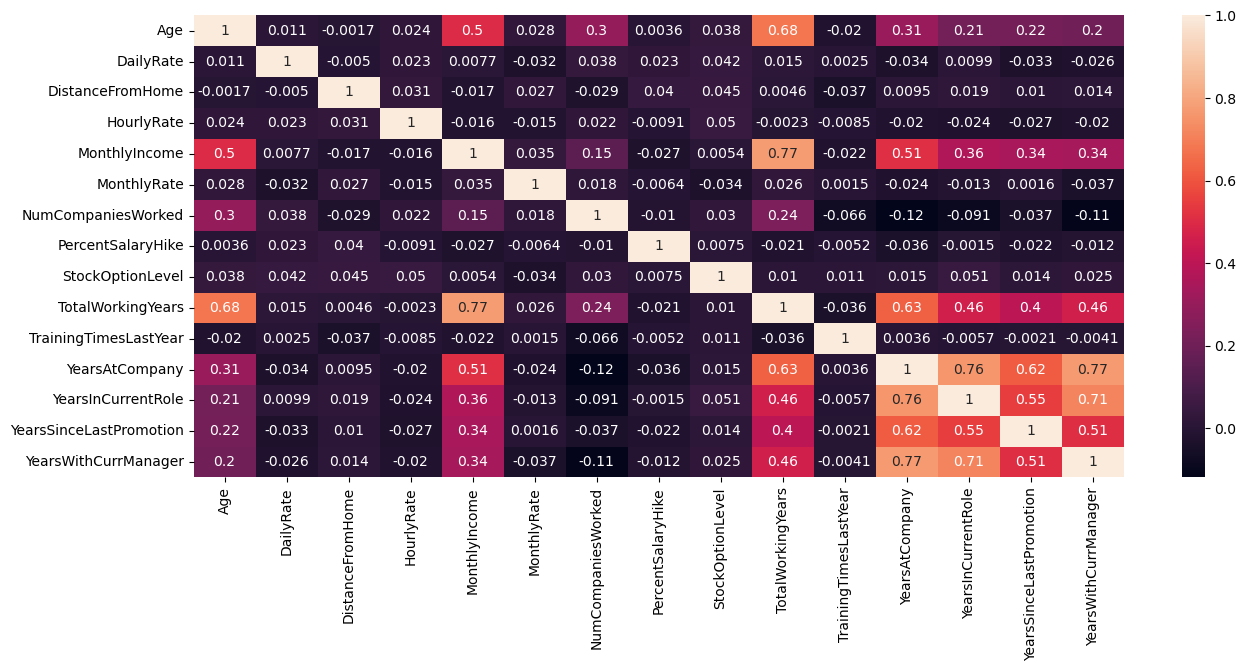

In [24]:
# correlation using heatmap
corr=data.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True)
plt.show()

<div style="text-align: center; background-color: orange; padding: 10px;">
    <h2 style="font-weight: bold;">ENCODING</h2>
</div>

### <span style='color:blue'>1] LABEL ENCODING </span> 

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_col=['Attrition','BusinessTravel','Education','OverTime','JobLevel','WorkLifeBalance','Gender','RelationshipSatisfaction','JobSatisfaction','JobInvolvement','EnvironmentSatisfaction','PerformanceRating']
data[cat_col]=data[cat_col].apply(le.fit_transform)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,2,0,...,0,1,0,8,0,0,6,4,0,5
1,49,0,1,279,Research & Development,8,1,Life Sciences,0,1,...,1,3,1,10,3,2,10,7,1,7
2,37,1,2,1373,Research & Development,2,2,Other,3,1,...,0,2,0,7,3,2,0,0,0,0
3,33,0,1,1392,Research & Development,3,4,Life Sciences,3,0,...,0,0,0,8,3,2,8,7,3,0
4,27,0,2,591,Research & Development,2,1,Medical,1,1,...,0,3,1,6,3,2,2,2,2,2


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int32 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int32 
 9   Gender                    1470 non-null   int32 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int32 
 12  JobLevel                  1470 non-null   int32 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [27]:
one_col=['JobRole','Department','MaritalStatus','EducationField']
data_one=pd.get_dummies(data[one_col], drop_first=True)
data_one.head()

,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [28]:
data_new=pd.concat([data,data_one], axis = 1)
data_new.drop(['JobRole','Department','MaritalStatus','EducationField'],inplace=True,axis=1)
data_new.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Sales Representative,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1,2,1102,1,2,2,0,94,0,...,0,0,1,0,1,1,0,0,0,0
1,49,0,1,279,8,1,0,1,61,2,...,0,1,0,1,0,1,0,0,0,0
2,37,1,2,1373,2,2,3,1,92,2,...,0,1,0,0,1,0,0,0,1,0
3,33,0,1,1392,3,4,3,0,56,0,...,0,1,0,1,0,1,0,0,0,0
4,27,0,2,591,2,1,1,1,40,0,...,0,1,0,1,0,0,0,1,0,0


In [29]:
print(data_new.shape)

# Remove duplicate Features
data_new = data_new.T.drop_duplicates()
data_new = data_new.T

# Remove Duplicate Rows
data_new.drop_duplicates(inplace=True)

print(data_new.shape)

(1470, 44)
(1470, 44)


<AxesSubplot:>

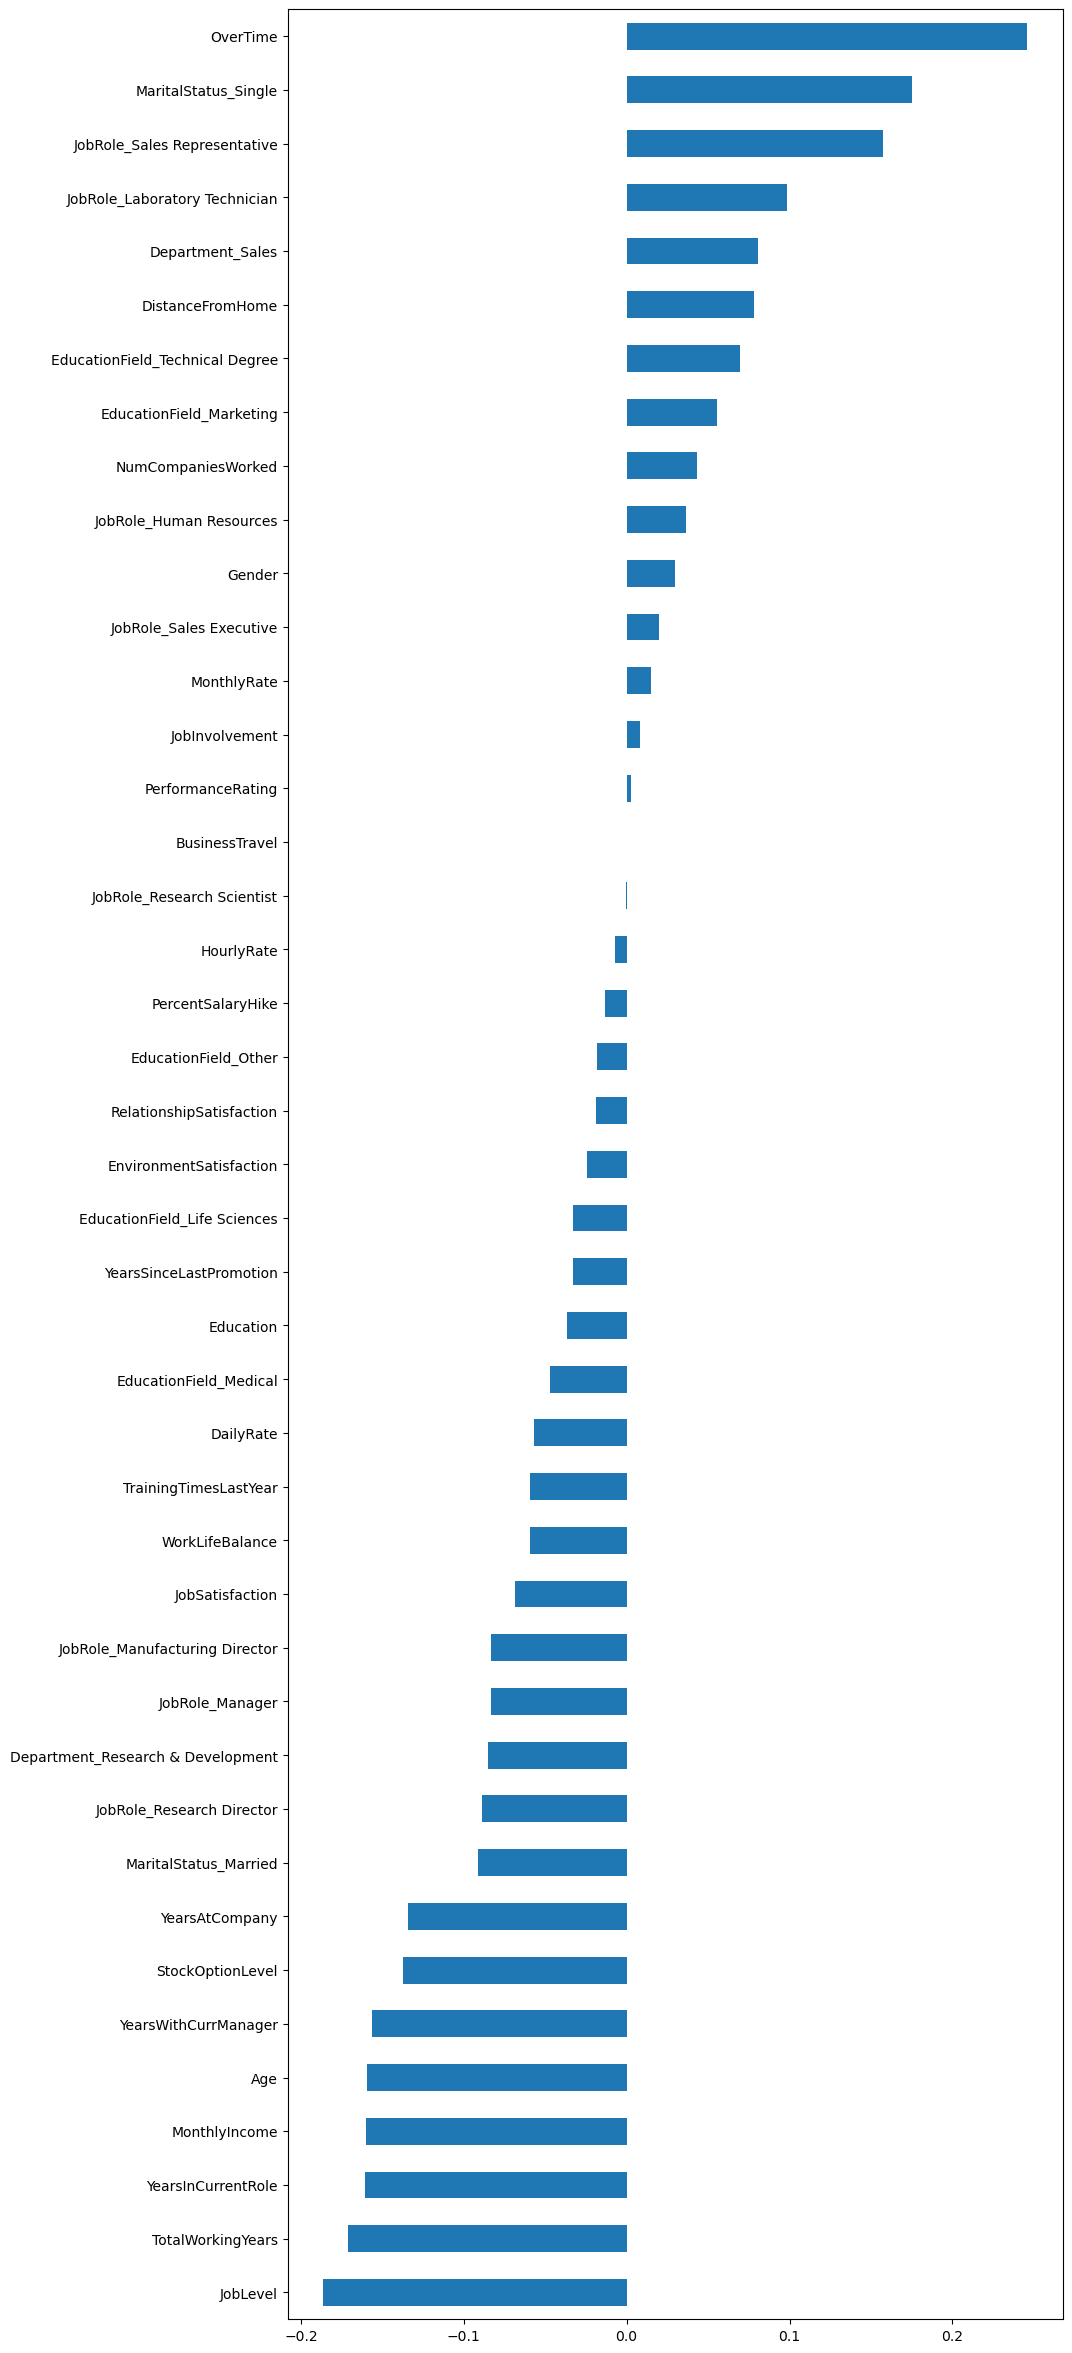

In [30]:
data_new.drop('Attrition', axis=1).corrwith(data_new.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [31]:
feature_correlation = data_new.drop('Attrition', axis=1).corrwith(data_new.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

33

<div style="text-align: center; background-color: orange; padding: 10px;">
    <h2 style="font-weight: bold;">MODEL CREATION</h2>
</div>

### <span style='color:blue'>1] TRAIN AND TEST DATASET SPLIT </span> 

In [32]:
x= data_new.drop('Attrition', axis=1)
y = data_new.Attrition

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
                                                    


### <span style='color:blue'>2] STANDARD SCALING </span> 

In [33]:
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 82.90%
Leaving Rate: 17.10%
===============TEST=================
Staying Rate: 86.17%
Leaving Rate: 13.83%


### <span style='color:blue'>3] OVER SAMPLING </span> 

**Observation Report:** Target variable is unbalanced, with much more 'No' values than 'Yes'
Using SMOTEsynthetically creating more'Yes' values and have a 50/50 distribution for both classesduring training.I prefer oversample our minor class than undersampling the majorclass because i believe that undersampling may cause loss of relevant data.

In [35]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=42)
x_train_os,y_train_os=os.fit_resample(x_train,y_train)

In [36]:
from collections import Counter
print("The number of classes before fit {}",format(Counter(y_train)))
print("The number of classes after fit {}",format(Counter(y_train_os)))

The number of classes before fit {} Counter({0: 853, 1: 176})
The number of classes after fit {} Counter({0: 853, 1: 853})


<div style="text-align: center; background-color: orange; padding: 10px;">
    <h2 style="font-weight: bold;">LOGISTIC REGRESSION</h2>
</div>

In [37]:
def evaluate(model, x_train_os, x_test, y_train_os, y_test):
    y_test_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train_os)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train_os, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train_os, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train_os, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    

In [38]:
folds=KFold(n_splits=5,shuffle=False)
params={
    'penalty':['l2','elasticnet','none'],
    'C':[0.01,0.1,1,10,100,1000],
    'solver':['lbfgs','newton-cg','liblinear','sag'],
    'max_iter': [300,1000,2500],
    
    
    
}

lr_clf=LogisticRegression(random_state=42)
model_cvlog=GridSearchCV(lr_clf,param_grid=params,cv=folds,n_jobs=-1,verbose=1,scoring='roc_auc')
model_cvlog.fit(x_train_os,y_train_os)
lr_clf =model_cvlog.best_estimator_
lr_clf.fit(x_train_os,y_train_os)
evaluate(lr_clf, x_train_os, x_test, y_train_os, y_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[665 188]
 [144 709]]
ACCURACY SCORE:
0.8054
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.822002    0.790412  0.805393     0.806207      0.806207
recall       0.779601    0.831184  0.805393     0.805393      0.805393
f1-score     0.800241    0.810286  0.805393     0.805263      0.805263
support    853.000000  853.000000  0.805393  1706.000000   1706.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[278 102]
 [ 20  41]]
ACCURACY SCORE:
0.7234
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.932886   0.286713  0.723356    0.609800      0.843506
recall       0.731579   0.672131  0.723356    0.701855      0.723356
f1-score     0.820059   0.401961  0.723356    0.611010      0.762227
support    380.000000  61.000000  0.723356  441.000000    441.000000


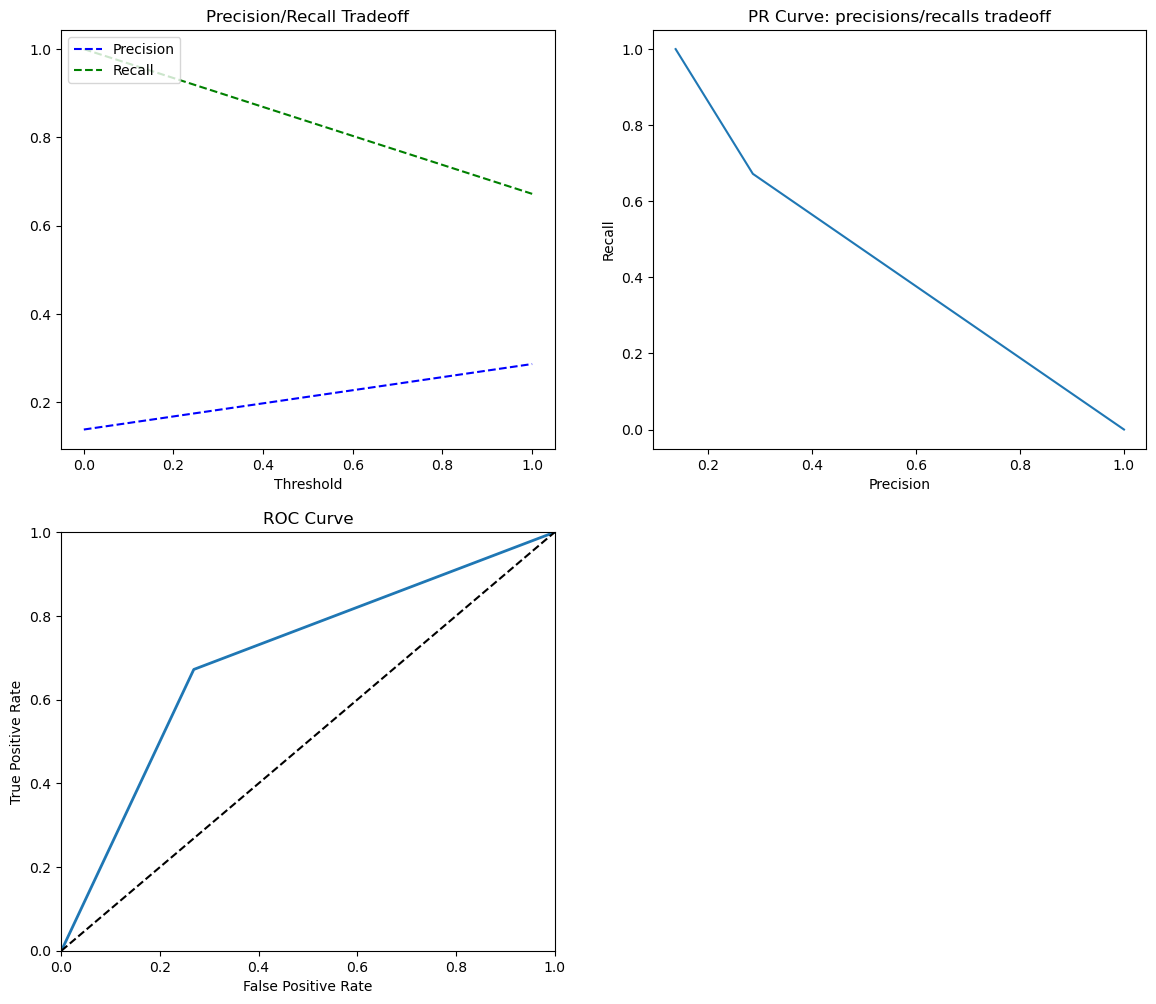

In [39]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
   
    
precisions, recalls, thresholds = precision_recall_curve(y_test,lr_clf.predict(x_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test,lr_clf.predict(x_test))
plot_roc_curve(fpr, tpr)

<div style="text-align: center; background-color: orange; padding: 10px;">
    <h2 style="font-weight: bold;">RANDOM FOREST CLASSIFIER</h2>
</div>

In [40]:
model_rf = RandomForestClassifier(n_estimators=100, bootstrap=False)
                                    
model_rf.fit(x_train_os, y_train_os)
evaluate(model_rf, x_train_os, x_test, y_train_os, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[853   0]
 [  0 853]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  853.0       1.0     1706.0        1706.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[372   8]
 [ 54   7]]
ACCURACY SCORE:
0.8594
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.873239   0.466667   0.85941    0.669953      0.817001
recall       0.978947   0.114754   0.85941    0.546851      0.859410
f1-score     0.923077   0.184211   0.85941    0.553644      0.820875
support    380.000000  61.000000   0.85941  441.000000    441.000000


In [41]:
param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=folds, verbose=1, n_jobs=-1)
search.fit(x_train_os, y_train_os)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(x_train_os, y_train_os)
evaluate(rf_clf, x_train_os, x_test, y_train_os, y_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[716 137]
 [190 663]]
ACCURACY SCORE:
0.8083
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.790287    0.828750  0.808324     0.809518      0.809518
recall       0.839390    0.777257  0.808324     0.808324      0.808324
f1-score     0.814099    0.802178  0.808324     0.808138      0.808138
support    853.000000  853.000000  0.808324  1706.000000   1706.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[321  59]
 [ 32  29]]
ACCURACY SCORE:
0.7937
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.909348   0.329545  0.793651    0.619447      0.829149
recall       0.844737   0.475410  0.793651    0.660073      0.793651
f1-score     0.875853   0.389262  0.793651    0.632557      0.808546
support    380.000000  61.000000  0.793651  441.000000    441.000000


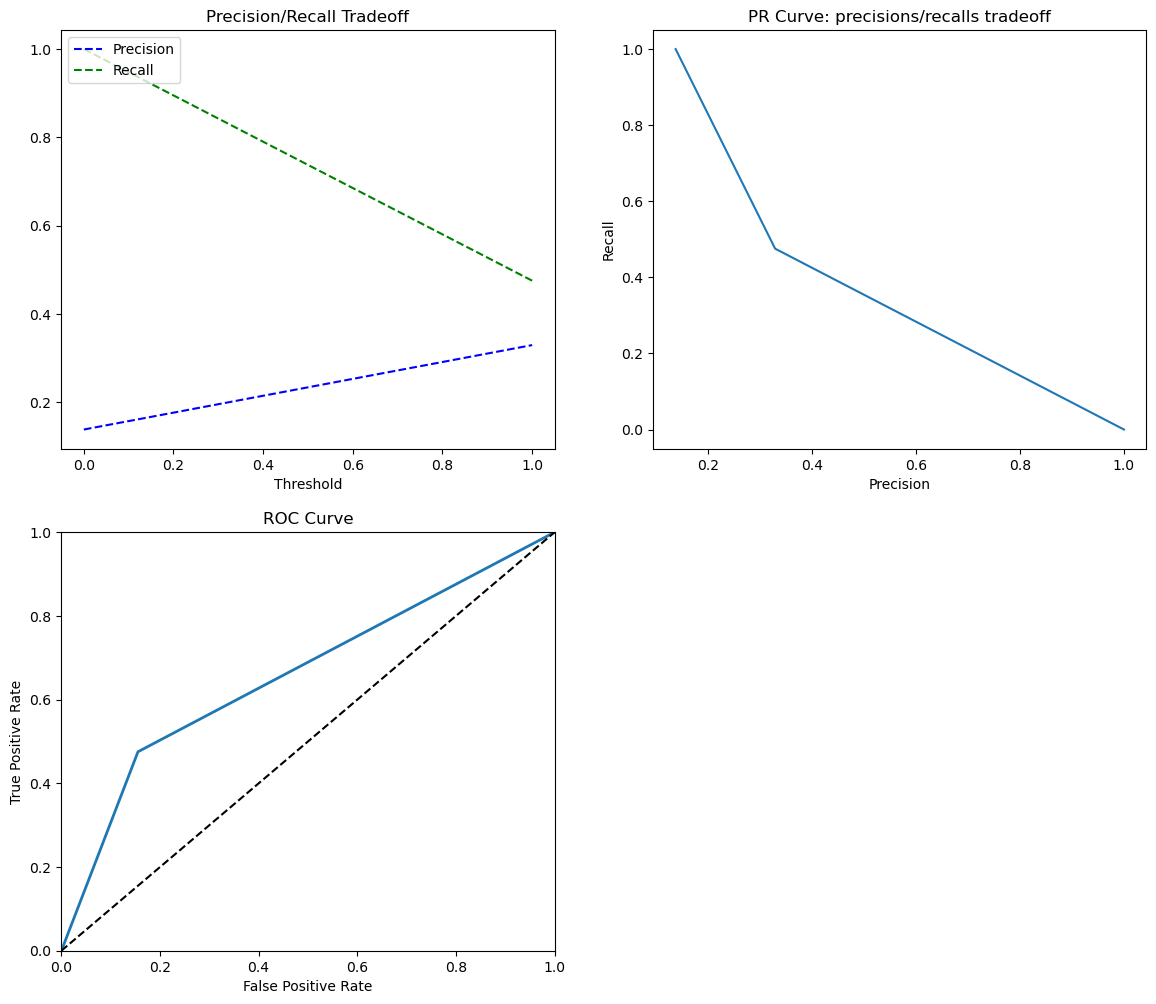

In [42]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(x_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(x_test))
plot_roc_curve(fpr, tpr)

In [43]:
def feature_imp(df, model):
    feature = pd.DataFrame()
    feature["feature"] = df.columns
    feature["importance"] = model.feature_importances_
    return feature.sort_values(by="importance", ascending=False)

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

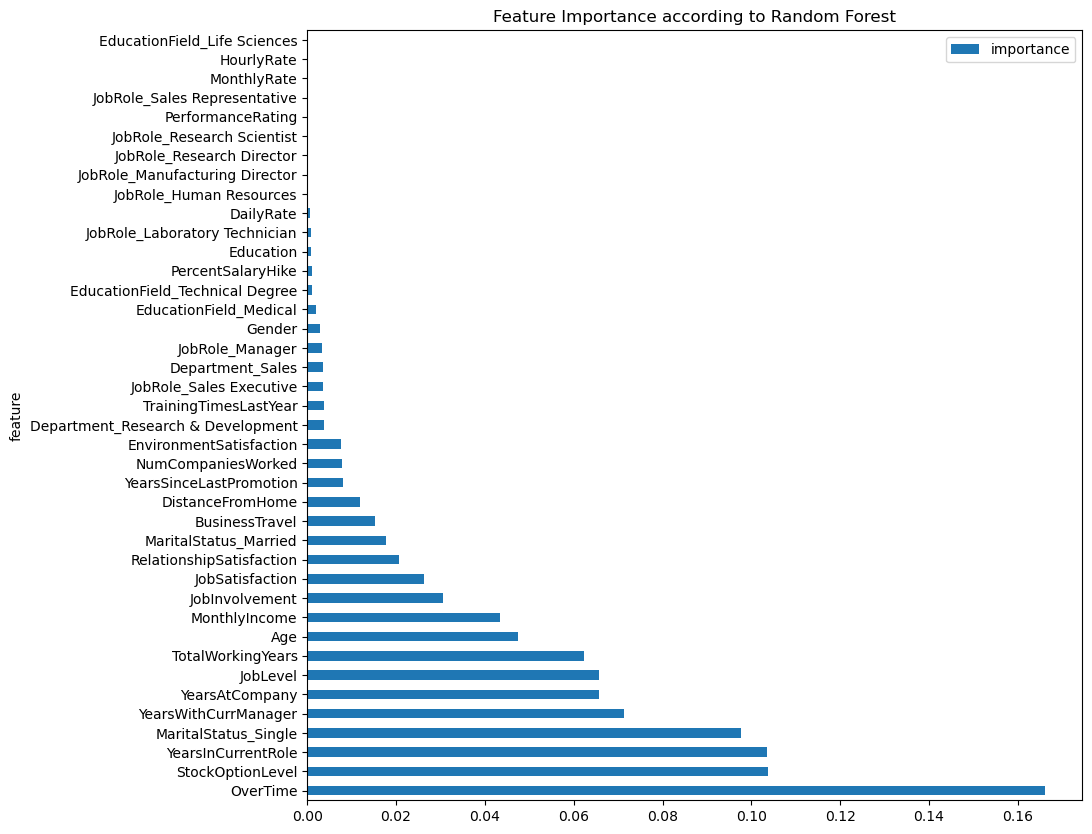

In [44]:
df = feature_imp(x, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

<div style="text-align: center; background-color: orange; padding: 10px;">
    <h2 style="font-weight: bold;">SUPPORT VECTOR MACHINE</h2>
</div>

In [45]:
svm_clf = SVC()
svm_clf.fit(x_train_os, y_train_os)

evaluate(svm_clf, x_train_os, x_test, y_train_os, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[814  39]
 [ 12 841]]
ACCURACY SCORE:
0.9701
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.985472    0.955682  0.970106     0.970577      0.970577
recall       0.954279    0.985932  0.970106     0.970106      0.970106
f1-score     0.969625    0.970571  0.970106     0.970098      0.970098
support    853.000000  853.000000  0.970106  1706.000000   1706.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[344  36]
 [ 36  25]]
ACCURACY SCORE:
0.8367
CLASSIFICATION REPORT:
                    0          1  accuracy  macro avg  weighted avg
precision    0.905263   0.409836  0.836735    0.65755      0.836735
recall       0.905263   0.409836  0.836735    0.65755      0.836735
f1-score     0.905263   0.409836  0.836735    0.65755      0.836735
support    380.000000  61.000000  0.836735  441.00000    441.000000


In [46]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]  

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=folds, refit=True, verbose=1)
search.fit(x_train_os, y_train_os)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [47]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(x_train_os, y_train_os)

evaluate(svm_clf, x_train_os, x_test, y_train_os, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[670 183]
 [129 724]]
ACCURACY SCORE:
0.8171
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.838548    0.798236  0.817116     0.818392      0.818392
recall       0.785463    0.848769  0.817116     0.817116      0.817116
f1-score     0.811138    0.822727  0.817116     0.816933      0.816933
support    853.000000  853.000000  0.817116  1706.000000   1706.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[275 105]
 [ 19  42]]
ACCURACY SCORE:
0.7188
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.935374   0.285714  0.718821    0.610544      0.845512
recall       0.723684   0.688525  0.718821    0.706104      0.718821
f1-score     0.816024   0.403846  0.718821    0.609935      0.759011
support    380.000000  61.000000  0.718821  441.000000    441.000000


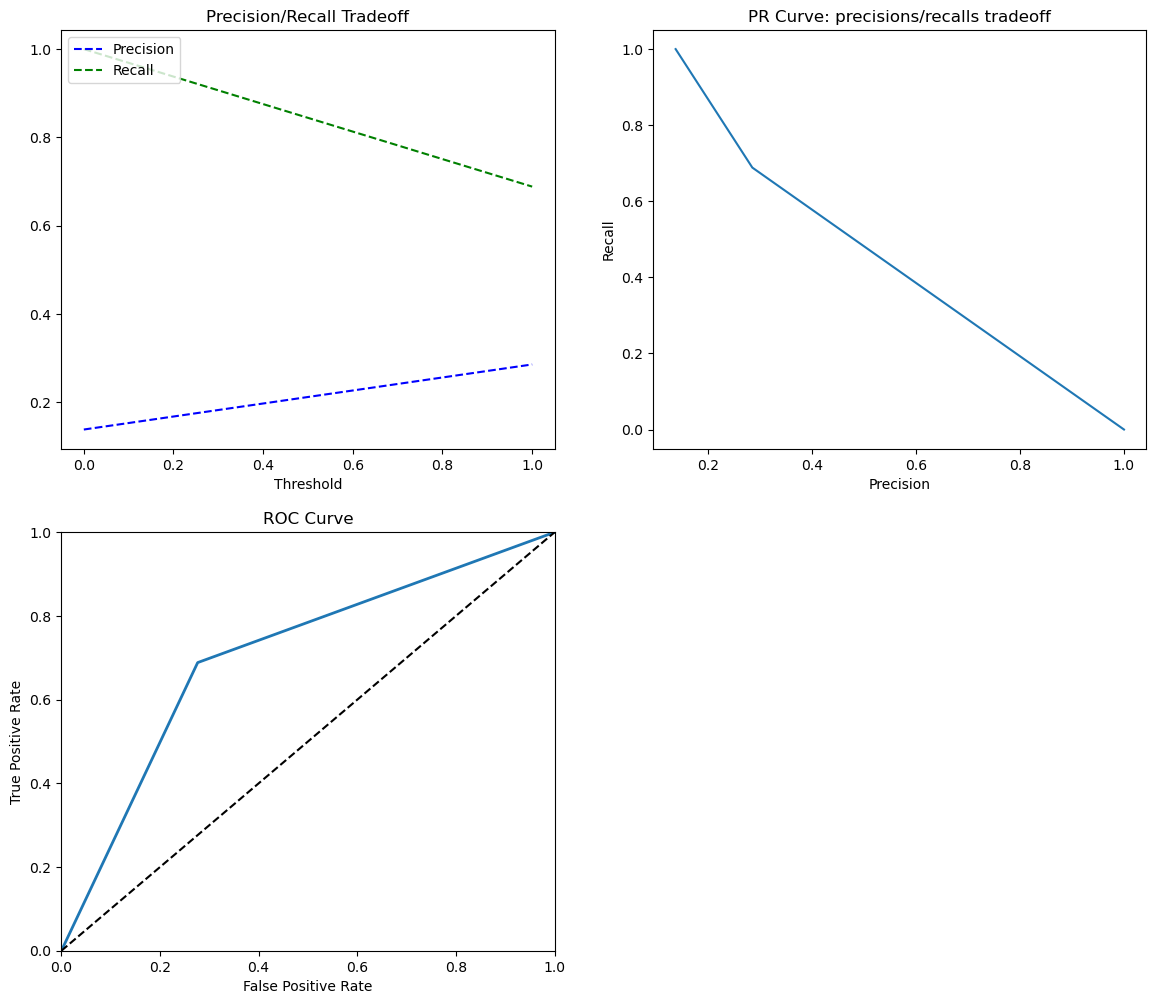

In [48]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(x_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(x_test))
plot_roc_curve(fpr, tpr)

<div style="text-align: center; background-color: orange; padding: 10px;">
    <h2 style="font-weight: bold;">XGBOOST CLASSIFIER</h2>
</div>

In [49]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train_os, y_train_os)

evaluate(xgb_clf, x_train_os, x_test, y_train_os, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[853   0]
 [  0 853]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  853.0       1.0     1706.0        1706.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[364  16]
 [ 43  18]]
ACCURACY SCORE:
0.8662
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.894349   0.529412  0.866213    0.711880      0.843870
recall       0.957895   0.295082  0.866213    0.626488      0.866213
f1-score     0.925032   0.378947  0.866213    0.651990      0.849496
support    380.000000  61.000000  0.866213  441.000000    441.000000


In [50]:
param_grid = {
    'n_estimators':[100,300,900,1100,1500],
    'max_depth':[2,3,5,10,25],
    'learning_rate':[0.05,0.1,0.15,0.20],
    'booster':['gbtree','gblinear'],
    'min_child_weight':[1,2,3,4,5]
}

xgb_clf = XGBClassifier(random_state=42) 
search = GridSearchCV(xgb_clf, param_grid=param_grid, scoring='roc_auc', cv=folds, verbose=1, n_jobs=-1)
search.fit(x_train_os, y_train_os)

xgb_clf = XGBClassifier(**search.best_params_, random_state=42)
xgb_clf.fit(x_train_os, y_train_os)
evaluate(xgb_clf, x_train_os, x_test, y_train_os, y_test)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[803  50]
 [104 749]]
ACCURACY SCORE:
0.9097
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.885336    0.937422   0.90973     0.911379      0.911379
recall       0.941383    0.878077   0.90973     0.909730      0.909730
f1-score     0.912500    0.906780   0.90973     0.909640      0.909640
support    853.000000  853.000000   0.90973  1706.000000   1706.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[357  23]
 [ 37  24]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.906091   0.510638  0.863946    0.708365      0.851392
recall       0.939474   0.393443  0.863946    0.666458      0.863946
f1-score     0.922481   0.444444  0.863946    0.683463      0.856358
support    380.000000  61.000000  0.863946  441.000000    441.000000


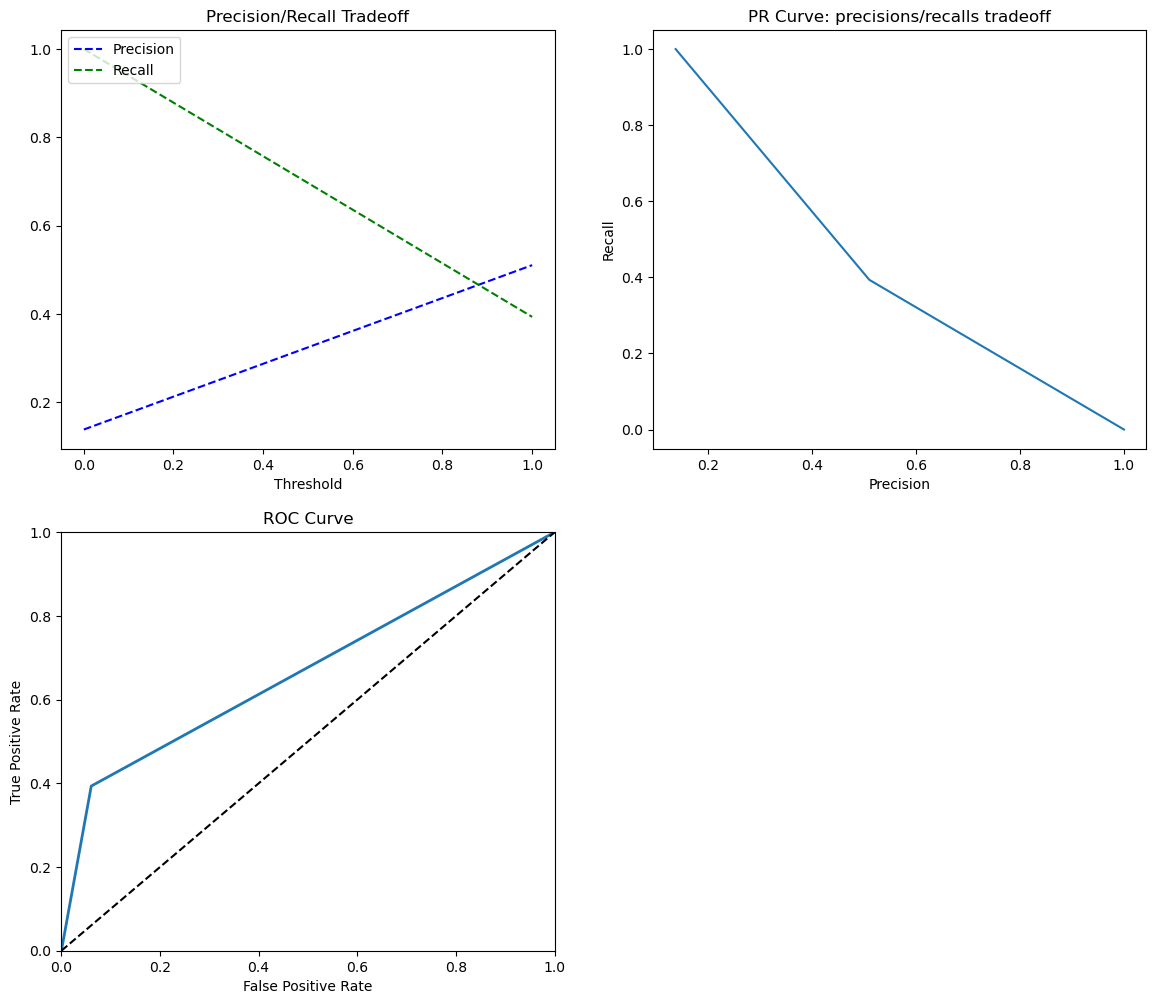

In [51]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(x_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(x_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

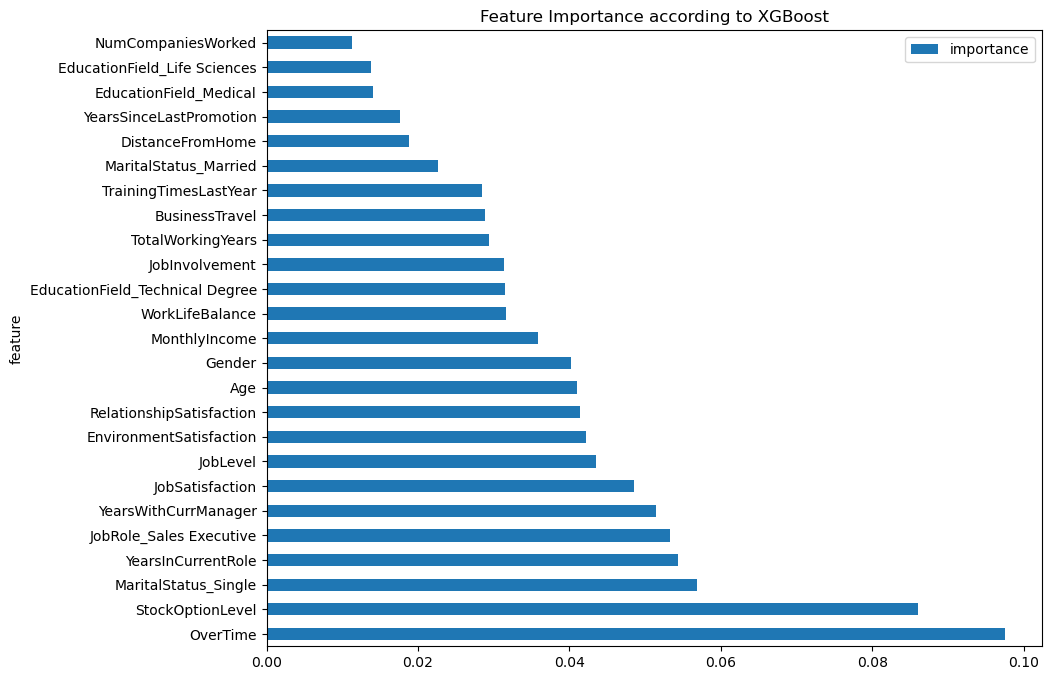

In [52]:
df = feature_imp(x, xgb_clf)[:25]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

<div style="text-align: center; background-color: orange; padding: 10px;">
    <h2 style="font-weight: bold;">CATBOOST CLASSIFIER</h2>
</div>

In [53]:
cb_clf = CatBoostClassifier()
cb_clf.fit(x_train_os, y_train_os, verbose=0)

evaluate(cb_clf, x_train_os, x_test, y_train_os, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[853   0]
 [  0 853]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  853.0       1.0     1706.0        1706.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[372   8]
 [ 43  18]]
ACCURACY SCORE:
0.8844
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.896386   0.692308  0.884354    0.794347      0.868157
recall       0.978947   0.295082  0.884354    0.637015      0.884354
f1-score     0.935849   0.413793  0.884354    0.674821      0.863637
support    380.000000  61.000000  0.884354  441.000000    441.000000


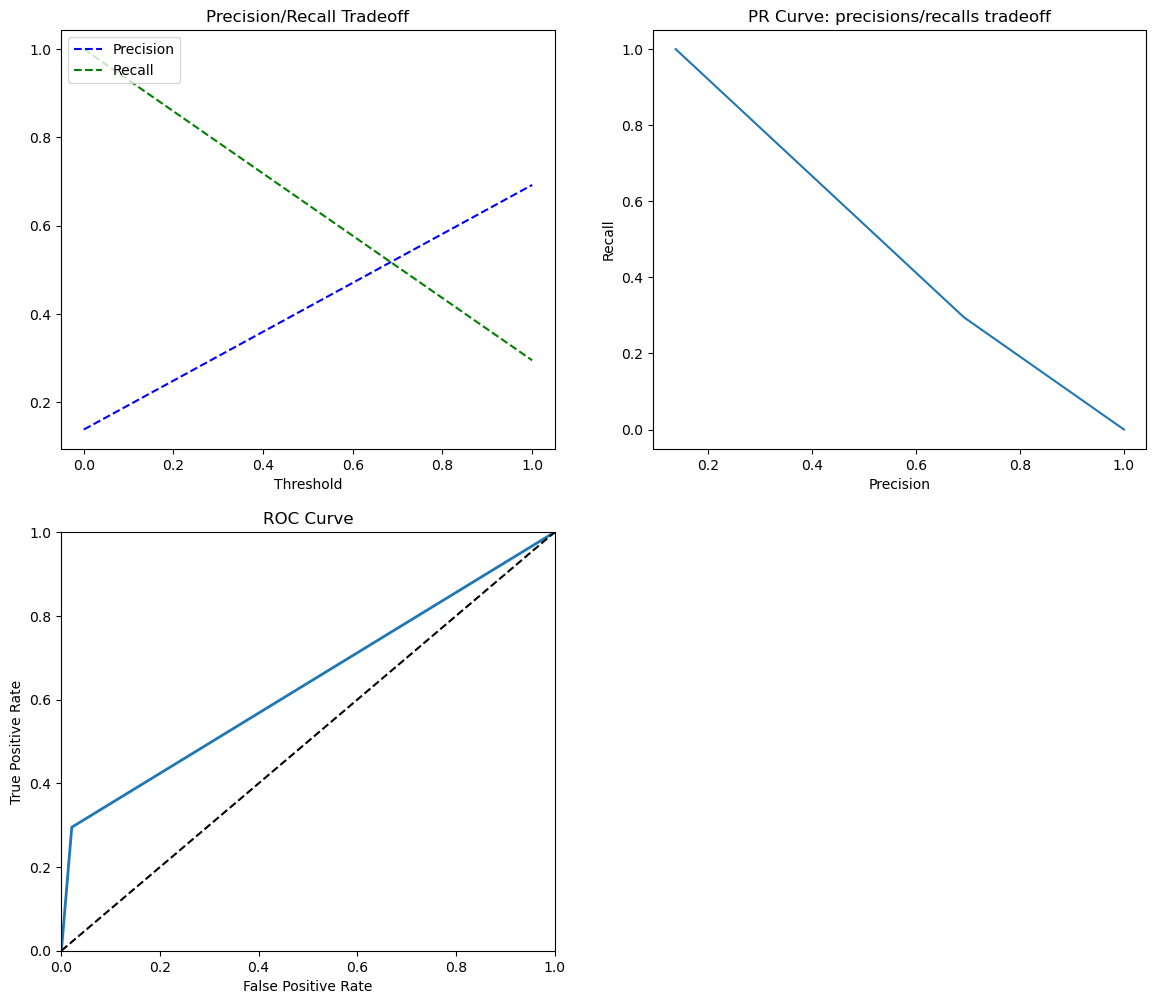

In [54]:
precisions, recalls, thresholds = precision_recall_curve(y_test, cb_clf.predict(x_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, cb_clf.predict(x_test))
plot_roc_curve(fpr, tpr)

<div style="text-align: center; background-color: orange; padding: 10px;">
    <h2 style="font-weight: bold;">ADABOOST CLASSIFIER</h2>
</div>

In [55]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(x_train_os, y_train_os)

evaluate(ab_clf, x_train_os, x_test, y_train_os, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[795  58]
 [ 70 783]]
ACCURACY SCORE:
0.9250
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.919075    0.931034  0.924971     0.925055      0.925055
recall       0.932005    0.917937  0.924971     0.924971      0.924971
f1-score     0.925495    0.924439  0.924971     0.924967      0.924967
support    853.000000  853.000000  0.924971  1706.000000   1706.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[350  30]
 [ 31  30]]
ACCURACY SCORE:
0.8617
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.918635   0.500000  0.861678    0.709318      0.860729
recall       0.921053   0.491803  0.861678    0.706428      0.861678
f1-score     0.919842   0.495868  0.861678    0.707855      0.861197
support    380.000000  61.000000  0.861678  441.000000    441.000000


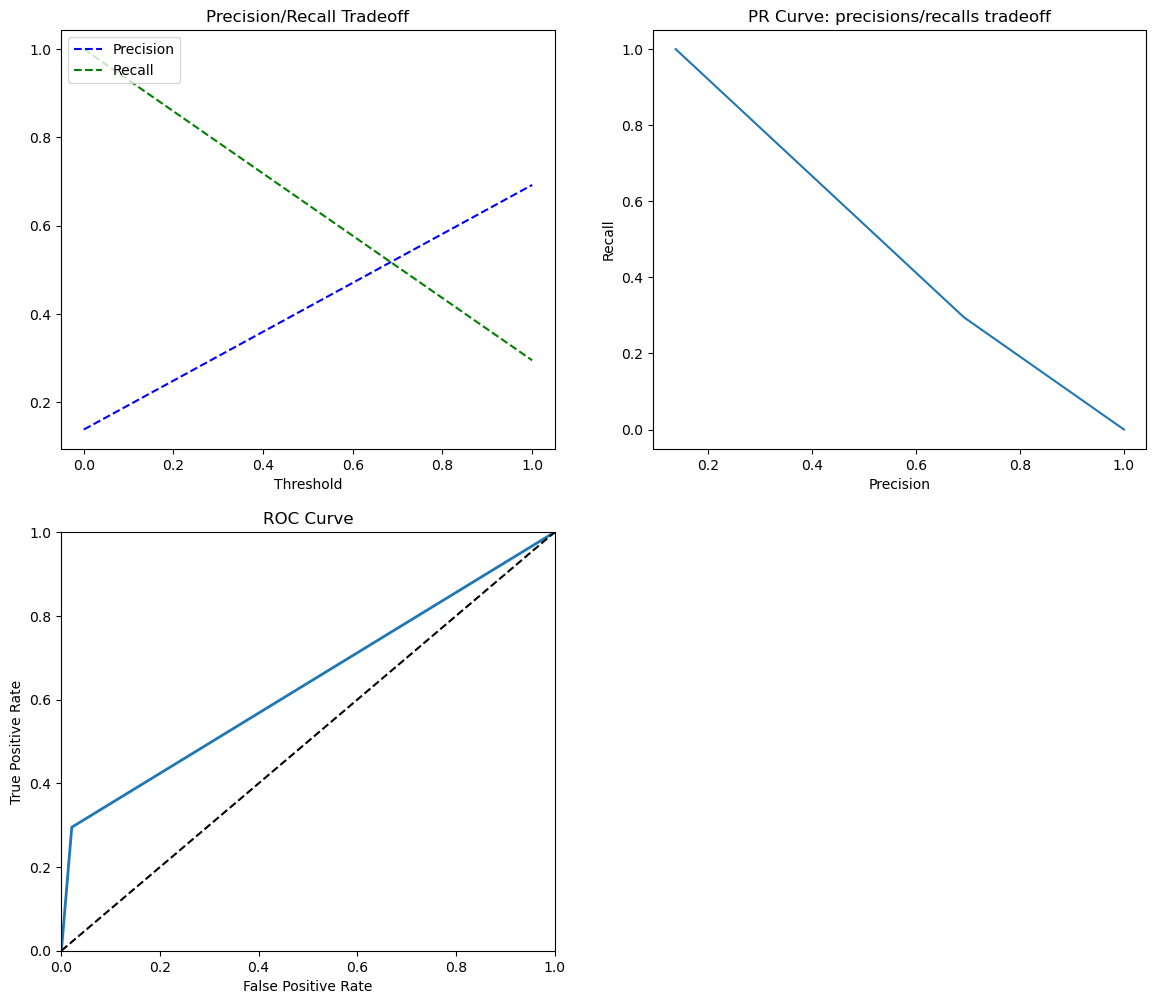

In [56]:
precisions, recalls, thresholds = precision_recall_curve(y_test, cb_clf.predict(x_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, cb_clf.predict(x_test))
plot_roc_curve(fpr, tpr)

<div style="text-align: center; background-color: orange; padding: 10px;">
    <h2 style="font-weight: bold;">DECISION TREE CLASSIFIER</h2>
</div>

In [57]:
de_clf=DecisionTreeClassifier(criterion = 'entropy')
de_clf.fit(x_train_os,y_train_os)

evaluate(de_clf, x_train_os, x_test, y_train_os, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[853   0]
 [  0 853]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  853.0       1.0     1706.0        1706.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[328  52]
 [ 36  25]]
ACCURACY SCORE:
0.8005
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.901099   0.324675  0.800454    0.612887      0.821367
recall       0.863158   0.409836  0.800454    0.636497      0.800454
f1-score     0.881720   0.362319  0.800454    0.622020      0.809876
support    380.000000  61.000000  0.800454  441.000000    441.000000


<div style="text-align: center; background-color: orange; padding: 10px;">
    <h2 style="font-weight: bold;">COMPARING MODEL PERFORMANCE</h2>
</div>

In [58]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
    'CatBoost': cb_clf,
    'AdaBoost': ab_clf,
    'Decision Tree' :de_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(x_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.660
XGBOOST                        roc_auc_score: 0.666
LOGISTIC REGRESSION            roc_auc_score: 0.702
SUPPORT VECTOR MACHINE         roc_auc_score: 0.706
CATBOOST                       roc_auc_score: 0.637
ADABOOST                       roc_auc_score: 0.706
DECISION TREE                  roc_auc_score: 0.636


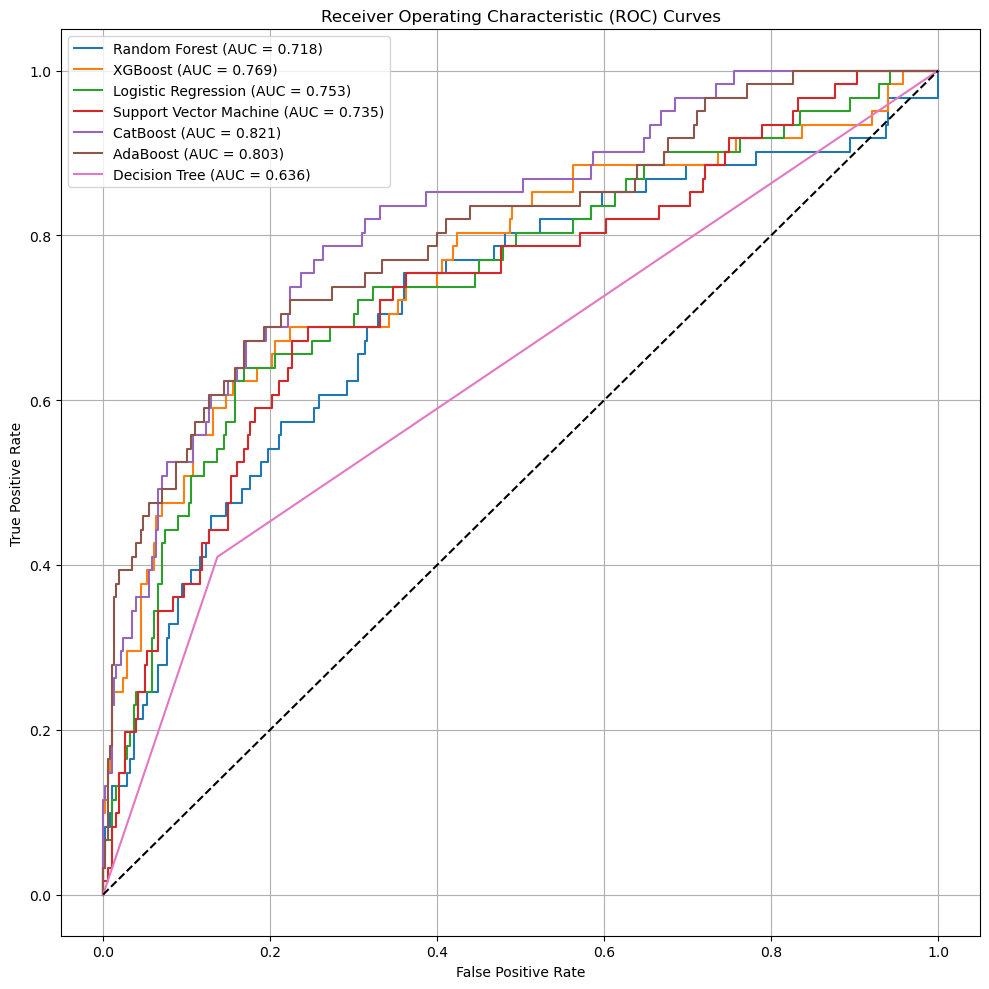

In [63]:
plt.figure(figsize=(10, 10))

# Iterate through each model
for model_name, model in ml_models.items():
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
        # Predict probabilities for positive class
        y_pred_prob = model.predict_proba(x_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function or predict
        y_pred_prob = model.decision_function(x_test) if hasattr(model, "decision_function") else model.predict(x_test)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    
    # Compute AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [60]:
for model in ml_models:
    print(f"{model.upper():30} Accuracy_score: {accuracy_score(y_test, ml_models[model].predict(x_test)):.3f} Precision:{precision_score(y_test, ml_models[model].predict(x_test)):.3f} Recall{recall_score(y_test, ml_models[model].predict(x_test)):.3f}")


RANDOM FOREST                  Accuracy_score: 0.794 Precision:0.330 Recall0.475
XGBOOST                        Accuracy_score: 0.864 Precision:0.511 Recall0.393
LOGISTIC REGRESSION            Accuracy_score: 0.723 Precision:0.287 Recall0.672
SUPPORT VECTOR MACHINE         Accuracy_score: 0.719 Precision:0.286 Recall0.689
CATBOOST                       Accuracy_score: 0.884 Precision:0.692 Recall0.295
ADABOOST                       Accuracy_score: 0.862 Precision:0.500 Recall0.492
DECISION TREE                  Accuracy_score: 0.800 Precision:0.325 Recall0.410


1. Since the data set is highly imbalanced with the negative class having 84% of the total instances, accuracy is not a good measure for model comparison as any naive classifier would also yield 84% accuracy.
2. Precision defines how correctly is the minor class being detected and recall states how much is the minor class being detected.
3. In this problem statement our aim is to decrease False Negative.
4. The higher the precision and lower recall values in baseline condition conclude that the minority class is not detected much but whenever detected the degree of trust is high.
5. on contrary, the higher recall and lower precision value conclude that even though the minority class is being detected but degree of trust in that detection is very low.
6. The models specializedb for imbalanced class scenarios showed promising outcomes in all metrics.
7. Finally it can be conclude that CatBoost,XGBoost,AdaBoost,RandomForest and LogisticRegression are the best models among the above mentioned.
